In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw= pd.read_excel("DA project1.xlsx")

In [3]:
raw.head()

,Institute name,Area,City,Course Focus,Aws and devops,Java full sack,Data science and AI,python,Target Audience,Faculty Expertise,Training Methodology,Placement Rate,Average Salary,Placement Support,Internship Opportunities,average Fees,Certifications Offered,review
0,social prachar,kphb,Hyderabad,"java full stack,data science and ai,aws and de...",yes,yes,yes,yes,eligible for every graduate,well qualified,online and offline training,good,3.5lpa,"resume preparation,linkedin profile creation,...",yes,"20,000 to 45,000",yes,4.7/5
1,Veda IT,JNTU UNIVERSITY,Hyderabad,"java ful stack,data analytics,manual testing,p...",yes,yes,yes,yes,Freshers and experience,Experience,"online training,online test center,classroom t...",good,4lpa,soft skills training,available for only java full stack,50000 to 100000,yes,3.9/5
2,CRS Info Solutions,Ammerpet,Hyderabad,"devops automation,devops engineers,rpa trainin...",yes,no,NO,NO,Freshers and experience,Experience,"online training,classroom training",good,3.5lpa,"interview preparation,job placement assistance...",offers internship,5000 to 7000,yes,4.0/5
3,Naresh I Technologies,Ammerpet and kphb,Hyderabad,"Advanced java training,angular raining,azure d...",yes,yes,yes,yes,Freshers and experience and carrer gap,Experience,online and offline training,average,3lpa,"job placement assistance,project training,resu...",offers internship,1999 to 10000,yes,4.5/5
4,SAPFICO infinity world,Ammerpet,Hyderabad,"software testing,sa fico training",no,NaN,no,no,Freshers and experience,Experience,online and offline training,good,3.3lpa,"real time projects,resume preperation,intervie...",no,25000 to 75000,yes,3.0/5


In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Institute name            101 non-null    object
 1   Area                      101 non-null    object
 2   City                      101 non-null    object
 3   Course Focus              101 non-null    object
 4   Aws and devops            101 non-null    object
 5   Java full sack            96 non-null     object
 6   Data science and AI       96 non-null     object
 7    python                   94 non-null     object
 8   Target Audience           97 non-null     object
 9   Faculty Expertise         97 non-null     object
 10  Training Methodology      95 non-null     object
 11  Placement Rate            97 non-null     object
 12  Average Salary            99 non-null     object
 13  Placement Support         100 non-null    object
 14  Internship Opportunities  

In [5]:
def colcheck(df , col):
    print("column: ", col)
    print()
    print(f"Number Of Unique Values In Column:{df[col].nunique()}")
    print()
    print("unique values in column:")
    print()
    print(df[col].unique())
    print()
    print("data type of column:" , df[col].dtype)
    print()

In [6]:
for col in raw.columns:
    colcheck(raw,col)

column:  Institute name

Number Of Unique Values In Column:100

unique values in column:

['social prachar' 'Veda IT' 'CRS Info Solutions' 'Naresh I Technologies'
 'SAPFICO infinity world' 'Sivasoft Technologies' 'sathya technologies'
 'Vagdevi Technologies' 'Ashok Technologies' 'Dreams media Solution'
 'stansys software solutions' 'Best It Academy' 'TCS Ion Trainig center'
 'Magneq software' 'SV infotech' 'MIIT Computer Education'
 'Data Minds Analytics' 'Emeregent Methodology pvt ltd'
 'Creative Multimedia Academy' 'Nys Innovations' 'Websoft Technologies'
 'Genesis IT Solutions' 'Coss Cloud Solutions ' 'Thanush Info Solutions'
 'Achieversit' 'Data Pulse infotech' 'V soft it solutions private ltd'
 'Future Gen Technologies' 'Orbit Bn Reddy' 'Bridge Q Systems'
 'Narayana Technologies' 'kalyan it Hub' 'NeoTeach Software education'
 'Risein Academy' 'karan institute' '7i tech solutions' 'Tecks academy'
 'Vidyanidhi Technologies' 'gro career' 'Tech Iq' 'Excel Logics'
 'sri Amsoft Technolo

In [7]:
raw['Institute name']=raw['Institute name'].str.strip()
raw['Area']=raw['Area'].str.strip()
raw['City']=raw['City'].str.strip()
raw['Course Focus']=raw['Course Focus'].str.strip()


In [8]:
raw.columns

Index(['Institute name', 'Area', 'City', 'Course Focus', 'Aws and devops',
       'Java full sack', 'Data science and AI', ' python', 'Target Audience',
       'Faculty Expertise', 'Training Methodology', 'Placement Rate',
       'Average Salary', 'Placement Support', 'Internship Opportunities',
       'average Fees ', 'Certifications Offered', 'review'],
      dtype='object')

In [9]:
raw['Data science and AI'] = raw['Data science and AI'].str.strip()
raw['Java full sack'] = raw['Java full sack'].str.strip()
raw.rename(columns={"Java full sack": "Java full stack"}, inplace=True)
raw[' python'] = raw[' python'].str.strip()

raw['Aws and devops'] = raw['Aws and devops'].str.strip().replace("yno",np.nan)



In [10]:
raw['Target Audience']=raw['Target Audience'].replace("  ","")

In [11]:
raw['Training Methodology']=raw['Training Methodology'].replace("online and offline training","online and  offline training")
raw['Training Methodology']=raw['Training Methodology'].replace("computer training  and training institute","online and  offline training")
raw['Training Methodology']=raw['Training Methodology'].replace("online training,classroom training","online and  offline training")
raw['Training Methodology']=raw['Training Methodology'].replace("online training,online test center,classroom training","online and  offline training")



In [12]:

raw['Internship Opportunities'] = raw['Internship Opportunities'].str.replace('|'.join(['available for only java full stack','offers internship','remote internships']), 'yes', regex=True)
raw['Internship Opportunities']=raw['Internship Opportunities'].str.strip()

In [13]:
raw = raw.rename(columns={'Average Salary':'Average Salary in lpa'})

In [14]:
raw = raw.rename(columns={'review':'review out of 5'})

In [15]:
raw = raw.rename(columns={' python':'python'})

In [16]:
raw['Average Salary in lpa'] = raw['Average Salary in lpa'].str.replace('lpa','')
raw['Average Salary in lpa'] = raw['Average Salary in lpa'].astype(float)

In [17]:
raw['review out of 5'] = raw['review out of 5'].astype(str)
raw['review out of 5'] = raw['review out of 5'].str.replace('/5', '')

In [18]:
raw['review out of 5'] = raw['review out of 5'].astype(float)

In [19]:
raw.columns

Index(['Institute name', 'Area', 'City', 'Course Focus', 'Aws and devops',
       'Java full stack', 'Data science and AI', 'python', 'Target Audience',
       'Faculty Expertise', 'Training Methodology', 'Placement Rate',
       'Average Salary in lpa', 'Placement Support',
       'Internship Opportunities', 'average Fees ', 'Certifications Offered',
       'review out of 5'],
      dtype='object')

In [20]:
raw['average Fees ']=raw['average Fees '].str.replace("lakh","00000")

In [21]:
raw['minfee'] = pd.to_numeric(raw['average Fees '].str.split("to").str[0].str.replace(",", "").str.strip())
raw['maxfee'] = pd.to_numeric(raw['average Fees '].str.split("to").str[1].str.replace(",", "").str.strip())


In [22]:
raw=raw.drop(columns={'average Fees '})

In [23]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Institute name            101 non-null    object 
 1   Area                      101 non-null    object 
 2   City                      101 non-null    object 
 3   Course Focus              101 non-null    object 
 4   Aws and devops            100 non-null    object 
 5   Java full stack           96 non-null     object 
 6   Data science and AI       96 non-null     object 
 7   python                    94 non-null     object 
 8   Target Audience           97 non-null     object 
 9   Faculty Expertise         97 non-null     object 
 10  Training Methodology      95 non-null     object 
 11  Placement Rate            97 non-null     object 
 12  Average Salary in lpa     99 non-null     float64
 13  Placement Support         100 non-null    object 
 14  Internship

In [24]:
raw

,Institute name,Area,City,Course Focus,Aws and devops,Java full stack,Data science and AI,python,Target Audience,Faculty Expertise,Training Methodology,Placement Rate,Average Salary in lpa,Placement Support,Internship Opportunities,Certifications Offered,review out of 5,minfee,maxfee
0,social prachar,kphb,Hyderabad,"java full stack,data science and ai,aws and de...",yes,yes,yes,yes,eligible for every graduate,well qualified,online and offline training,good,3.5,"resume preparation,linkedin profile creation,...",yes,yes,4.7,20000.0,45000.0
1,Veda IT,JNTU UNIVERSITY,Hyderabad,"java ful stack,data analytics,manual testing,p...",yes,yes,yes,yes,Freshers and experience,Experience,online and offline training,good,4.0,soft skills training,yes,yes,3.9,50000.0,100000.0
2,CRS Info Solutions,Ammerpet,Hyderabad,"devops automation,devops engineers,rpa trainin...",yes,no,NO,NO,Freshers and experience,Experience,online and offline training,good,3.5,"interview preparation,job placement assistance...",yes,yes,4.0,5000.0,7000.0
3,Naresh I Technologies,Ammerpet and kphb,Hyderabad,"Advanced java training,angular raining,azure d...",yes,yes,yes,yes,Freshers and experience and carrer gap,Experience,online and offline training,average,3.0,"job placement assistance,project training,resu...",yes,yes,4.5,1999.0,10000.0
4,SAPFICO infinity world,Ammerpet,Hyderabad,"software testing,sa fico training",no,NaN,no,no,Freshers and experience,Experience,online and offline training,good,3.3,"real time projects,resume preperation,intervie...",no,yes,3.0,25000.0,75000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Nacc,banashankari,banglore,"java,python,ms excel,powerbi,c++programming",no,yes,no,yes,freshers and experience,Experience,offline training,good,3.4,job assisance,yes,NaN,3.0,10000.0,20000.0
97,master mind learning solutions,Electronic city,banglore,"aws,data science,devops,java,python,web develo...",yes,yes,yes,yes,freshers and experience,Experience,online and offline training,good,4.0,job assisance,yes,yes,4.0,30000.0,50000.0
98,hackers university apc,M G Road,banglore,"aws,data science,java,python,oracle,cyber secu...",yes,yes,yes,yes,freshers and experience,Experience,online and offline training,good,4.4,job assisance,yes,yes,4.2,30000.0,50000.0
99,stravan technologies,sanjay nagar,banglore,"java,python,data science,ms excel,oracle",no,yes,yes,NaN,freshers and experience,Experience,online and offline training,good,3.8,job assisance,yes,yes,3.8,30000.0,40000.0


In [25]:
for col in raw.columns:
    if raw[col].dtype==object:
       raw[col]=raw[col].str.lower()

In [26]:
raw.head()

,Institute name,Area,City,Course Focus,Aws and devops,Java full stack,Data science and AI,python,Target Audience,Faculty Expertise,Training Methodology,Placement Rate,Average Salary in lpa,Placement Support,Internship Opportunities,Certifications Offered,review out of 5,minfee,maxfee
0,social prachar,kphb,hyderabad,"java full stack,data science and ai,aws and de...",yes,yes,yes,yes,eligible for every graduate,well qualified,online and offline training,good,3.5,"resume preparation,linkedin profile creation,...",yes,yes,4.7,20000.0,45000.0
1,veda it,jntu university,hyderabad,"java ful stack,data analytics,manual testing,p...",yes,yes,yes,yes,freshers and experience,experience,online and offline training,good,4.0,soft skills training,yes,yes,3.9,50000.0,100000.0
2,crs info solutions,ammerpet,hyderabad,"devops automation,devops engineers,rpa trainin...",yes,no,no,no,freshers and experience,experience,online and offline training,good,3.5,"interview preparation,job placement assistance...",yes,yes,4.0,5000.0,7000.0
3,naresh i technologies,ammerpet and kphb,hyderabad,"advanced java training,angular raining,azure d...",yes,yes,yes,yes,freshers and experience and carrer gap,experience,online and offline training,average,3.0,"job placement assistance,project training,resu...",yes,yes,4.5,1999.0,10000.0
4,sapfico infinity world,ammerpet,hyderabad,"software testing,sa fico training",no,NaN,no,no,freshers and experience,experience,online and offline training,good,3.3,"real time projects,resume preperation,intervie...",no,yes,3.0,25000.0,75000.0


In [27]:
raw.tail()

,Institute name,Area,City,Course Focus,Aws and devops,Java full stack,Data science and AI,python,Target Audience,Faculty Expertise,Training Methodology,Placement Rate,Average Salary in lpa,Placement Support,Internship Opportunities,Certifications Offered,review out of 5,minfee,maxfee
96,nacc,banashankari,banglore,"java,python,ms excel,powerbi,c++programming",no,yes,no,yes,freshers and experience,experience,offline training,good,3.4,job assisance,yes,NaN,3.0,10000.0,20000.0
97,master mind learning solutions,electronic city,banglore,"aws,data science,devops,java,python,web develo...",yes,yes,yes,yes,freshers and experience,experience,online and offline training,good,4.0,job assisance,yes,yes,4.0,30000.0,50000.0
98,hackers university apc,m g road,banglore,"aws,data science,java,python,oracle,cyber secu...",yes,yes,yes,yes,freshers and experience,experience,online and offline training,good,4.4,job assisance,yes,yes,4.2,30000.0,50000.0
99,stravan technologies,sanjay nagar,banglore,"java,python,data science,ms excel,oracle",no,yes,yes,NaN,freshers and experience,experience,online and offline training,good,3.8,job assisance,yes,yes,3.8,30000.0,40000.0
100,apc learning solutions,ashoknagar,banglore,"java,aws,data science,devops,python,sql,c++pro...",yes,NaN,yes,yes,freshers and experience,experience,online and offline training,good,4.0,job assisance,yes,yes,4.3,40000.0,50000.0


In [28]:
raw[raw.duplicated()]

,Institute name,Area,City,Course Focus,Aws and devops,Java full stack,Data science and AI,python,Target Audience,Faculty Expertise,Training Methodology,Placement Rate,Average Salary in lpa,Placement Support,Internship Opportunities,Certifications Offered,review out of 5,minfee,maxfee


In [29]:
raw.shape

(101, 19)

In [30]:
raw.head()

,Institute name,Area,City,Course Focus,Aws and devops,Java full stack,Data science and AI,python,Target Audience,Faculty Expertise,Training Methodology,Placement Rate,Average Salary in lpa,Placement Support,Internship Opportunities,Certifications Offered,review out of 5,minfee,maxfee
0,social prachar,kphb,hyderabad,"java full stack,data science and ai,aws and de...",yes,yes,yes,yes,eligible for every graduate,well qualified,online and offline training,good,3.5,"resume preparation,linkedin profile creation,...",yes,yes,4.7,20000.0,45000.0
1,veda it,jntu university,hyderabad,"java ful stack,data analytics,manual testing,p...",yes,yes,yes,yes,freshers and experience,experience,online and offline training,good,4.0,soft skills training,yes,yes,3.9,50000.0,100000.0
2,crs info solutions,ammerpet,hyderabad,"devops automation,devops engineers,rpa trainin...",yes,no,no,no,freshers and experience,experience,online and offline training,good,3.5,"interview preparation,job placement assistance...",yes,yes,4.0,5000.0,7000.0
3,naresh i technologies,ammerpet and kphb,hyderabad,"advanced java training,angular raining,azure d...",yes,yes,yes,yes,freshers and experience and carrer gap,experience,online and offline training,average,3.0,"job placement assistance,project training,resu...",yes,yes,4.5,1999.0,10000.0
4,sapfico infinity world,ammerpet,hyderabad,"software testing,sa fico training",no,NaN,no,no,freshers and experience,experience,online and offline training,good,3.3,"real time projects,resume preperation,intervie...",no,yes,3.0,25000.0,75000.0


In [31]:

raw.to_csv("valid.csv", index=False)  # Saves without the index column

In [32]:
 # Save lowercase version
 pd.read_csv("valid.csv") 

,Institute name,Area,City,Course Focus,Aws and devops,Java full stack,Data science and AI,python,Target Audience,Faculty Expertise,Training Methodology,Placement Rate,Average Salary in lpa,Placement Support,Internship Opportunities,Certifications Offered,review out of 5,minfee,maxfee
0,social prachar,kphb,hyderabad,"java full stack,data science and ai,aws and de...",yes,yes,yes,yes,eligible for every graduate,well qualified,online and offline training,good,3.5,"resume preparation,linkedin profile creation,...",yes,yes,4.7,20000.0,45000.0
1,veda it,jntu university,hyderabad,"java ful stack,data analytics,manual testing,p...",yes,yes,yes,yes,freshers and experience,experience,online and offline training,good,4.0,soft skills training,yes,yes,3.9,50000.0,100000.0
2,crs info solutions,ammerpet,hyderabad,"devops automation,devops engineers,rpa trainin...",yes,no,no,no,freshers and experience,experience,online and offline training,good,3.5,"interview preparation,job placement assistance...",yes,yes,4.0,5000.0,7000.0
3,naresh i technologies,ammerpet and kphb,hyderabad,"advanced java training,angular raining,azure d...",yes,yes,yes,yes,freshers and experience and carrer gap,experience,online and offline training,average,3.0,"job placement assistance,project training,resu...",yes,yes,4.5,1999.0,10000.0
4,sapfico infinity world,ammerpet,hyderabad,"software testing,sa fico training",no,NaN,no,no,freshers and experience,experience,online and offline training,good,3.3,"real time projects,resume preperation,intervie...",no,yes,3.0,25000.0,75000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,nacc,banashankari,banglore,"java,python,ms excel,powerbi,c++programming",no,yes,no,yes,freshers and experience,experience,offline training,good,3.4,job assisance,yes,NaN,3.0,10000.0,20000.0
97,master mind learning solutions,electronic city,banglore,"aws,data science,devops,java,python,web develo...",yes,yes,yes,yes,freshers and experience,experience,online and offline training,good,4.0,job assisance,yes,yes,4.0,30000.0,50000.0
98,hackers university apc,m g road,banglore,"aws,data science,java,python,oracle,cyber secu...",yes,yes,yes,yes,freshers and experience,experience,online and offline training,good,4.4,job assisance,yes,yes,4.2,30000.0,50000.0
99,stravan technologies,sanjay nagar,banglore,"java,python,data science,ms excel,oracle",no,yes,yes,NaN,freshers and experience,experience,online and offline training,good,3.8,job assisance,yes,yes,3.8,30000.0,40000.0


In [33]:
data=raw.copy()

## **EDA**

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode  # connected to the Plotly service to display interactive plots directly in the notebook.
import plotly.express as px

init_notebook_mode(connected=True)

# To supress warnings in Visualizations
import warnings
warnings.filterwarnings("ignore")

In [35]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Institute name            101 non-null    object 
 1   Area                      101 non-null    object 
 2   City                      101 non-null    object 
 3   Course Focus              101 non-null    object 
 4   Aws and devops            100 non-null    object 
 5   Java full stack           96 non-null     object 
 6   Data science and AI       96 non-null     object 
 7   python                    94 non-null     object 
 8   Target Audience           97 non-null     object 
 9   Faculty Expertise         97 non-null     object 
 10  Training Methodology      95 non-null     object 
 11  Placement Rate            97 non-null     object 
 12  Average Salary in lpa     99 non-null     float64
 13  Placement Support         100 non-null    object 
 14  Internship

In [36]:
from simple_colors import *
class univariate:
    
    ############################ Numeric Continuous ############################
    def ncstudy(self, df, col):
        print(cyan("Uni-Variate Descriptive Stats:",['bold']))
        print()
        print(blue("******** Measures of Central Tendancy ************", ['bold']))
        print(magenta("Mean:",['bold']), round(df[col].mean(),2))
        print(magenta("Median:",['bold']), df[col].median())
        print(magenta("Mode:",['bold']), df[col].mode()[0]) # Taking first value
        print()
        print(blue("******** Measures of Dispersion ************",['bold']))
        print(magenta("Range:",['bold']), df[col].max()-df[col].min())
        print(magenta("Variance:",['bold']), round(df[col].var(),2))
        print(magenta("Standard Deviation:",['bold']), round(df[col].std(),2))
        print(magenta("Five Number Summary:",['bold']))
        print(round(df[col].describe(),2)[['min','25%','50%','75%','max']])
        print()
        print(blue("******** Measures of Symmetry ************",['bold']))
        print(magenta("Skewness:",['bold']), round(df[col].skew(),2))
        print(magenta("Kurtosis:",['bold']), round(df[col].kurt(),2))
        print()
        print(cyan("Visual - Distplot (Histogram + Desnsity plot):",['bold']))
        print()
        plt.figure(figsize=(4, 3))
        sns.distplot(df[col])
        plt.show()
    def catstudy(self, df, col):
        print(cyan("Uni-Variate Descriptive Stats:",['bold']))
        print()
        print(magenta("Number of Categories/Classes in column:",['bold']), df[col].nunique())
        print(magenta("Category Names:",['bold']))
        print(df[col].unique())
        print()
        print(magenta("Value Counts (FD) of each Category:",['bold']))
        print(df[col].value_counts())
        print()
        print(magenta("Value Counts of Each Class (FD) as Percentage:",['bold']))
        print(round((df[col].value_counts()/len(df))*100,2))
        print()
        print(magenta("Mode:",['bold']), df[col].mode()[0])
        print()
        print(cyan("Visual - Pie Chart:",['bold']))
        print()        
        print(black("Top Catgeories:", ['bold']))
        # Considering only top 10 categories for pie chart
        index = df[col].value_counts().sort_values(ascending=False)[0:10].index
        vals = df[col].value_counts().sort_values(ascending=False)[0:10].values
        fig = px.pie(names=index, values=vals, width=700, height=400)
        fig.update_traces(textposition='inside', textinfo='percent+label')
        fig.update_layout(showlegend=False)
        fig.show()
        print()

Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 100
Category Names:
['social prachar' 'veda it' 'crs info solutions' 'naresh i technologies'
 'sapfico infinity world' 'sivasoft technologies' 'sathya technologies'
 'vagdevi technologies' 'ashok technologies' 'dreams media solution'
 'stansys software solutions' 'best it academy' 'tcs ion trainig center'
 'magneq software' 'sv infotech' 'miit computer education'
 'data minds analytics' 'emeregent methodology pvt ltd'
 'creative multimedia academy' 'nys innovations' 'websoft technologies'
 'genesis it solutions' 'coss cloud solutions' 'thanush info solutions'
 'achieversit' 'data pulse infotech' 'v soft it solutions private ltd'
 'future gen technologies' 'orbit bn reddy' 'bridge q systems'
 'narayana technologies' 'kalyan it hub' 'neoteach software education'
 'risein academy' 'karan institute' '7i tech solutions' 'tecks academy'
 'vidyanidhi technologies' 'gro career' 'tech iq' 'excel logics'
 'sri amsoft technol


Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 47
Category Names:
['kphb' 'jntu university' 'ammerpet' 'ammerpet and kphb' 'sr nagar'
 'kothapet' 'dilsukhnagar' 'hayathnagar' 'as rao nagar' 'kompally'
 'kukatpally' 'bn reddy nagar' 'nallakunta' 'secunderabad' 'nagole'
 'hitech city' 'mehtipatnam' 'ranga reddy' 'himayat nagar' 'kondapur'
 'nizampet' 'manikonda' 'mahadevapura' 'kuvempu nagar' 'jayanagar'
 'kalyan nagar' 'aswath nagar' 'electronic city' 'btm layout'
 'yelahanka town' 'basaveshwar nagar' 'gandhi nagar' 'vijayanagar'
 'marathahalli' 'varthur' 'hsr layout' 'ashok nagar' 'munnekollal'
 'rajajinagar' 'adugodi' 'rajarajeshwari nagar' 'ramamurthy nagar'
 'malleswaram' 'banashankari' 'm g road' 'sanjay nagar' 'ashoknagar']

Value Counts (FD) of each Category:
Area
ammerpet                13
dilsukhnagar            12
kukatpally               7
marathahalli             5
vijayanagar              5
jayanagar                5
electronic city          3
aswa


Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 2
Category Names:
['hyderabad' 'banglore']

Value Counts (FD) of each Category:
City
hyderabad    55
banglore     46
Name: count, dtype: int64

Value Counts of Each Class (FD) as Percentage:
City
hyderabad    54.46
banglore     45.54
Name: count, dtype: float64

Mode: hyderabad

Visual - Pie Chart:

Top Catgeories:



Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 99
Category Names:
['java full stack,data science and ai,aws and devops,all full stack trainings,data analytics'
 'java ful stack,data analytics,manual testing,python full stack,'
 'devops automation,devops engineers,rpa training,mobile app development,data analytics,sales force administration trianing'
 'advanced java training,angular raining,azure devops,core java,data science,full sack ne core,ai,hadoop course,php with msql ,sql server raining,selenium,ui full sack,'
 'software testing,sa fico training'
 'advanced excel training,java,angular js,aws,big data analytics,c language,data analysis,data science,database services,django,dtp training,graphic designing,mern stack,python,ui'
 '.net full stack developer,3d animation,amazon aws cloud,angular training,application designing,automated testing,block chain course,java,data analytics,data science,django course,handoop,python,ui'
 'python,auto cad training,aws tra


Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 2
Category Names:
['yes' 'no' nan]

Value Counts (FD) of each Category:
Aws and devops
yes    64
no     36
Name: count, dtype: int64

Value Counts of Each Class (FD) as Percentage:
Aws and devops
yes    63.37
no     35.64
Name: count, dtype: float64

Mode: yes

Visual - Pie Chart:

Top Catgeories:



Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 2
Category Names:
['yes' 'no' nan]

Value Counts (FD) of each Category:
Java full stack
yes    79
no     17
Name: count, dtype: int64

Value Counts of Each Class (FD) as Percentage:
Java full stack
yes    78.22
no     16.83
Name: count, dtype: float64

Mode: yes

Visual - Pie Chart:

Top Catgeories:



Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 2
Category Names:
['yes' 'no' nan]

Value Counts (FD) of each Category:
Data science and AI
yes    69
no     27
Name: count, dtype: int64

Value Counts of Each Class (FD) as Percentage:
Data science and AI
yes    68.32
no     26.73
Name: count, dtype: float64

Mode: yes

Visual - Pie Chart:

Top Catgeories:



Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 2
Category Names:
['yes' 'no' nan]

Value Counts (FD) of each Category:
python
yes    79
no     15
Name: count, dtype: int64

Value Counts of Each Class (FD) as Percentage:
python
yes    78.22
no     14.85
Name: count, dtype: float64

Mode: yes

Visual - Pie Chart:

Top Catgeories:



Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 4
Category Names:
['eligible for every graduate' 'freshers and experience'
 'freshers and experience and carrer gap' nan 'corporates']

Value Counts (FD) of each Category:
Target Audience
freshers and experience                   82
eligible for every graduate               12
freshers and experience and carrer gap     2
corporates                                 1
Name: count, dtype: int64

Value Counts of Each Class (FD) as Percentage:
Target Audience
freshers and experience                   81.19
eligible for every graduate               11.88
freshers and experience and carrer gap     1.98
corporates                                 0.99
Name: count, dtype: float64

Mode: freshers and experience

Visual - Pie Chart:

Top Catgeories:



Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 2
Category Names:
['well qualified' 'experience' nan]

Value Counts (FD) of each Category:
Faculty Expertise
experience        83
well qualified    14
Name: count, dtype: int64

Value Counts of Each Class (FD) as Percentage:
Faculty Expertise
experience        82.18
well qualified    13.86
Name: count, dtype: float64

Mode: experience

Visual - Pie Chart:

Top Catgeories:



Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 3
Category Names:
['online and  offline training' nan 'offline training' 'online training']

Value Counts (FD) of each Category:
Training Methodology
online and  offline training    72
offline training                20
online training                  3
Name: count, dtype: int64

Value Counts of Each Class (FD) as Percentage:
Training Methodology
online and  offline training    71.29
offline training                19.80
online training                  2.97
Name: count, dtype: float64

Mode: online and  offline training

Visual - Pie Chart:

Top Catgeories:



Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 2
Category Names:
['good' 'average' nan]

Value Counts (FD) of each Category:
Placement Rate
good       85
average    12
Name: count, dtype: int64

Value Counts of Each Class (FD) as Percentage:
Placement Rate
good       84.16
average    11.88
Name: count, dtype: float64

Mode: good

Visual - Pie Chart:

Top Catgeories:



Uni-Variate Descriptive Stats:

******** Measures of Central Tendancy ************
Mean: 3.34
Median: 3.0
Mode: 3.0

******** Measures of Dispersion ************
Range: 3.0
Variance: 0.34
Standard Deviation: 0.58
Five Number Summary:
min    2.0
25%    3.0
50%    3.0
75%    3.8
max    5.0
Name: Average Salary in lpa, dtype: float64

******** Measures of Symmetry ************
Skewness: 0.27
Kurtosis: 0.48

Visual - Distplot (Histogram + Desnsity plot):



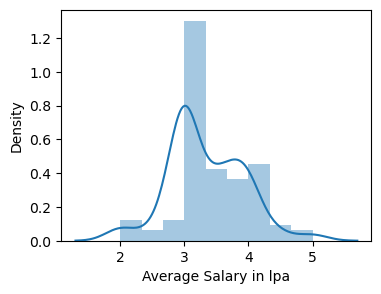

Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 29
Category Names:
['resume preparation,linkedin  profile creation,soft skills training'
 'soft skills training'
 'interview preparation,job placement assistance,maintainance services'
 'job placement assistance,project training,resume preperation'
 'real time projects,resume preperation,interview training'
 'resume preparation,linkedin  profile creation,portfolio website creation'
 'weekened training, workshops,jobs/soft skill training                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        


Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 2
Category Names:
['yes' 'no' nan]

Value Counts (FD) of each Category:
Internship Opportunities
yes    82
no     14
Name: count, dtype: int64

Value Counts of Each Class (FD) as Percentage:
Internship Opportunities
yes    81.19
no     13.86
Name: count, dtype: float64

Mode: yes

Visual - Pie Chart:

Top Catgeories:



Uni-Variate Descriptive Stats:

Number of Categories/Classes in column: 2
Category Names:
['yes' nan 'no']

Value Counts (FD) of each Category:
Certifications Offered
yes    95
no      2
Name: count, dtype: int64

Value Counts of Each Class (FD) as Percentage:
Certifications Offered
yes    94.06
no      1.98
Name: count, dtype: float64

Mode: yes

Visual - Pie Chart:

Top Catgeories:



Uni-Variate Descriptive Stats:

******** Measures of Central Tendancy ************
Mean: 3.99
Median: 4.0
Mode: 4.5

******** Measures of Dispersion ************
Range: 2.5
Variance: 0.3
Standard Deviation: 0.55
Five Number Summary:
min    2.5
25%    3.7
50%    4.0
75%    4.5
max    5.0
Name: review out of 5, dtype: float64

******** Measures of Symmetry ************
Skewness: -0.56
Kurtosis: -0.41

Visual - Distplot (Histogram + Desnsity plot):



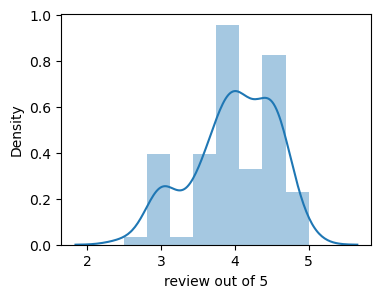

Uni-Variate Descriptive Stats:

******** Measures of Central Tendancy ************
Mean: 23770.82
Median: 20000.0
Mode: 20000.0

******** Measures of Dispersion ************
Range: 99000.0
Variance: 247336861.85
Standard Deviation: 15726.95
Five Number Summary:
min      1000.0
25%     14250.0
50%     20000.0
75%     30000.0
max    100000.0
Name: minfee, dtype: float64

******** Measures of Symmetry ************
Skewness: 1.64
Kurtosis: 5.25

Visual - Distplot (Histogram + Desnsity plot):



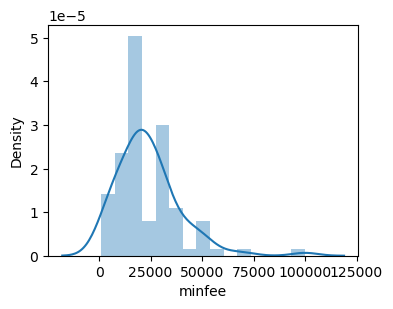

Uni-Variate Descriptive Stats:

******** Measures of Central Tendancy ************
Mean: 40656.25
Median: 32500.0
Mode: 30000.0

******** Measures of Dispersion ************
Range: 296500.0
Variance: 1110380592.11
Standard Deviation: 33322.37
Five Number Summary:
min      3500.0
25%     28750.0
50%     32500.0
75%     50000.0
max    300000.0
Name: maxfee, dtype: float64

******** Measures of Symmetry ************
Skewness: 5.21
Kurtosis: 38.58

Visual - Distplot (Histogram + Desnsity plot):



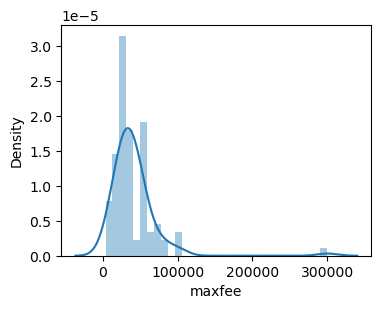

In [37]:
uni = univariate()

for col in raw.columns:
    if raw[col].dtype == object:
        uni.catstudy(raw, col)
    elif raw[col].dtype == 'float64':
        uni.ncstudy(raw, col)

**Bivarient**

**Mixed**

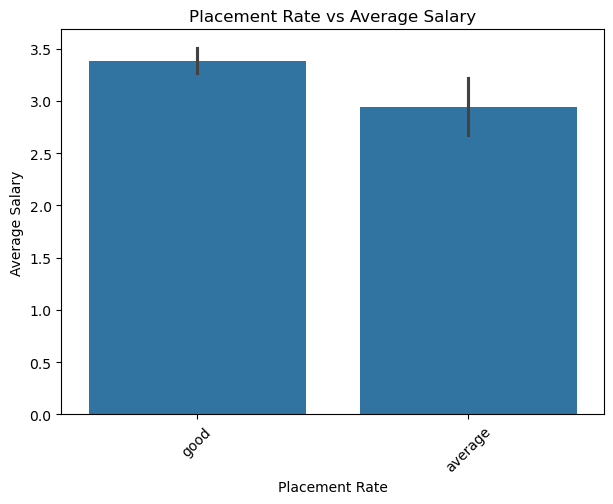

In [38]:
#Average Salary vs. Placement Rate
plt.figure(figsize=(7, 5))
sns.barplot(x=raw["Placement Rate"], y=raw["Average Salary in lpa"])
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title("Placement Rate vs Average Salary")
plt.xlabel("Placement Rate")
plt.ylabel("Average Salary")
plt.show()

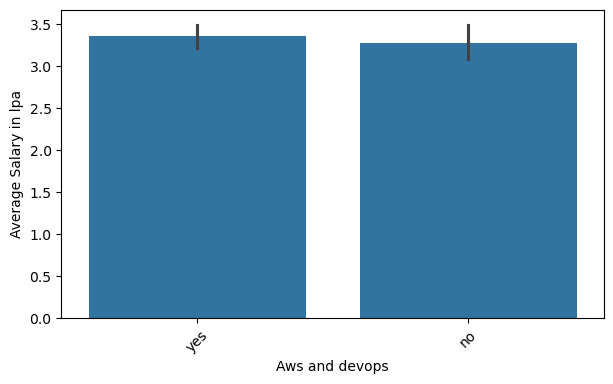

In [39]:
plt.figure(figsize=(7, 4))
sns.barplot(x="Aws and devops", y="Average Salary in lpa", data=raw)
plt.xticks(rotation=45)
plt.show()

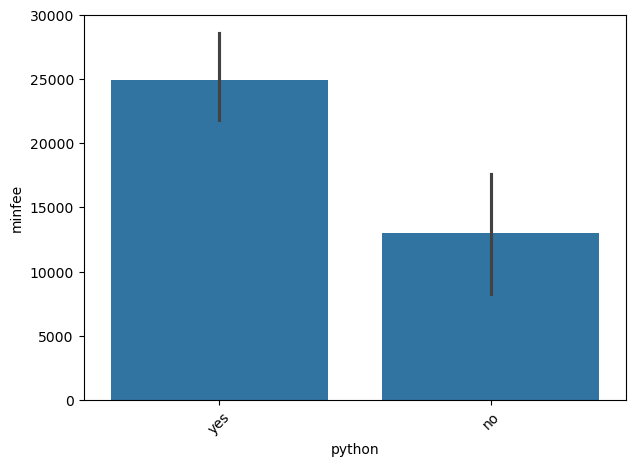

In [40]:
plt.figure(figsize=(7, 5))
sns.barplot(x="python", y="minfee", data=raw)
plt.xticks(rotation=45)
plt.show()

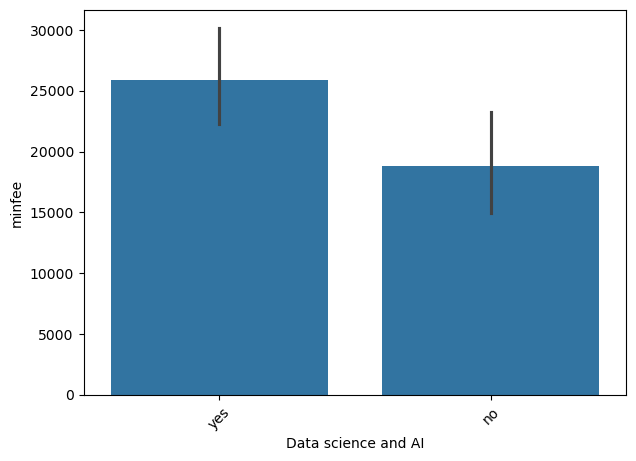

In [41]:
plt.figure(figsize=(7, 5))
sns.barplot(x="Data science and AI", y="minfee", data=raw)
plt.xticks(rotation=45)
plt.show()

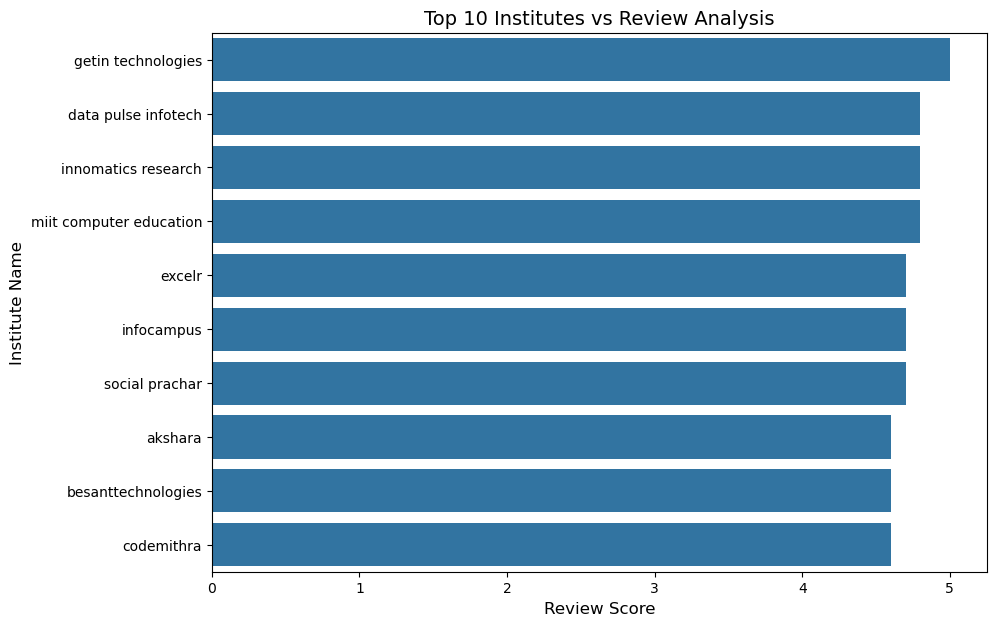

In [42]:
# Sorting and selecting the top 10 institutes based on review scores
top_10 = raw.groupby("Institute name")["review out of 5"].mean().nlargest(10).reset_index()

plt.figure(figsize=(10, 7))
sns.barplot(x=top_10["review out of 5"], y=top_10["Institute name"])
plt.xlabel("Review Score", fontsize=12)
plt.ylabel("Institute Name", fontsize=12)
plt.title("Top 10 Institutes vs Review Analysis", fontsize=14)
plt.yticks(fontsize=10)
plt.show()

Institute name Vs minfee


Institute name
getin technologies               100000.0
innomatics research               70000.0
skulpt technologies pvt ltd       60000.0
coss cloud solutions              50000.0
data pulse infotech               50000.0
jnana infotech                    50000.0
star medical coding institute     50000.0
veda it                           50000.0
itvedant education                45000.0
achieversit                       40000.0
Name: minfee, dtype: float64

<Axes: xlabel='minfee', ylabel='Institute name'>

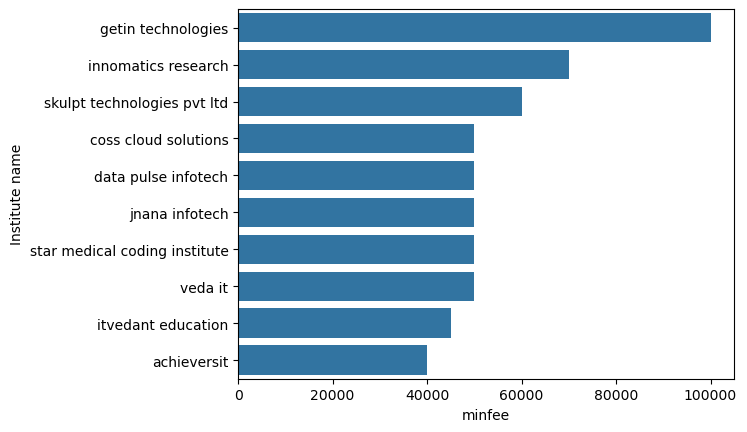

In [43]:
print("Institute name Vs minfee")

display(round(raw.groupby('Institute name')['minfee'].sum().nlargest(10).sort_values(ascending=False), 2))
p = raw.groupby('Institute name')['minfee'].sum().nlargest(10).reset_index()

sns.barplot(data=p, x='minfee', y='Institute name')

Institute name Vs maxfee


Institute name
getin technologies             300000.0
excelr                         100000.0
itvedant education             100000.0
veda it                        100000.0
akshara                         80000.0
skulpt technologies pvt ltd     80000.0
jnana infotech                  75000.0
sapfico infinity world          75000.0
coss cloud solutions            70000.0
data pulse infotech             70000.0
Name: maxfee, dtype: float64

<Axes: xlabel='maxfee', ylabel='Institute name'>

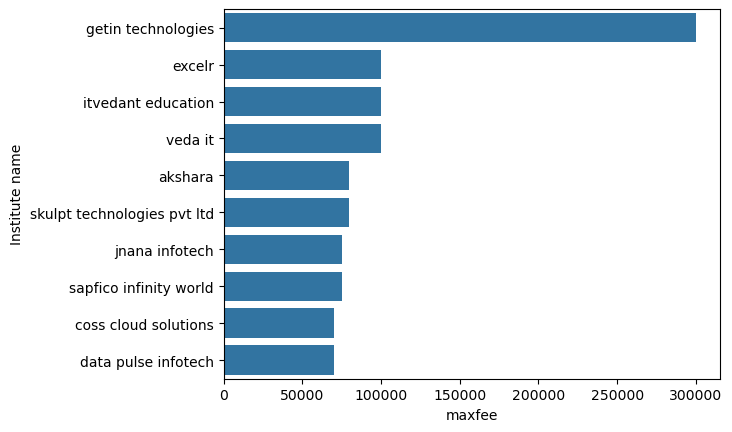

In [44]:
print("Institute name Vs maxfee")

display(round(raw.groupby('Institute name')['maxfee'].sum().nlargest(10).sort_values(ascending=False), 2))
p = raw.groupby('Institute name')['maxfee'].sum().nlargest(10).reset_index()

sns.barplot(data=p, x='maxfee', y='Institute name')

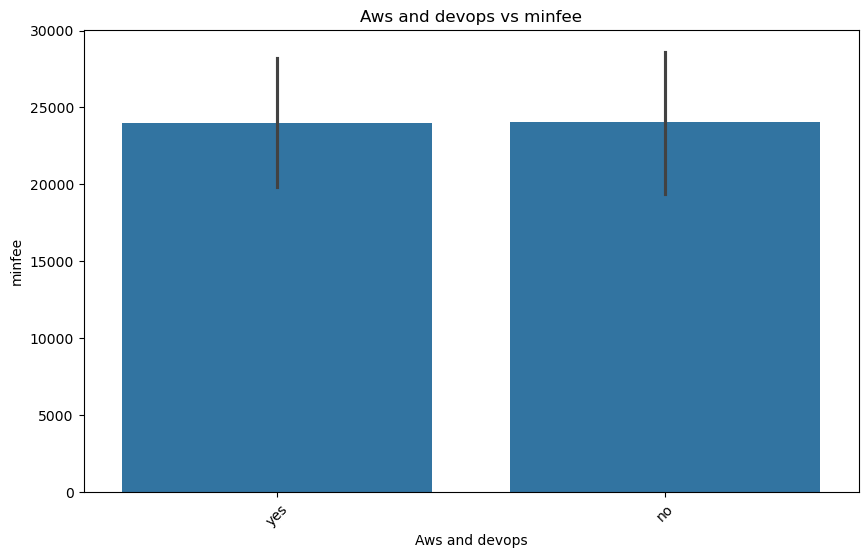

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x=raw["Aws and devops"], y=raw["minfee"])
plt.xticks(rotation=45)
plt.title("Aws and devops vs minfee" )
plt.show()

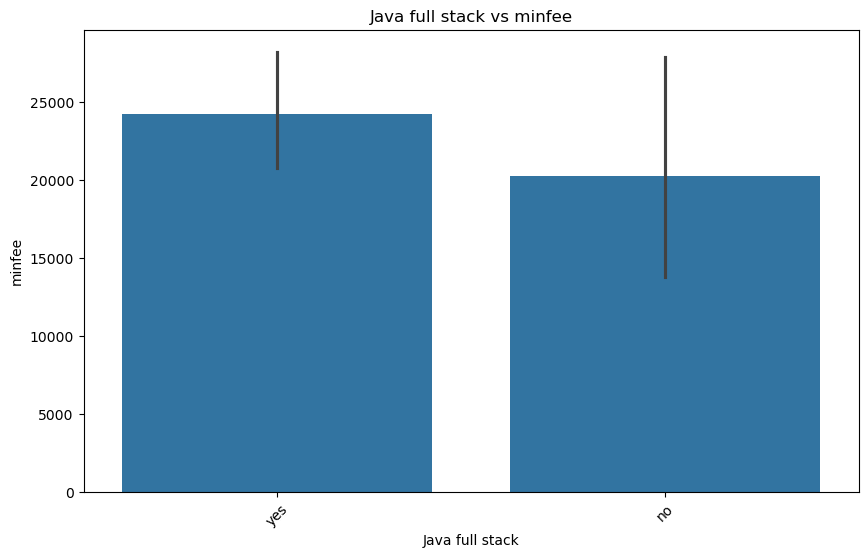

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(x=raw["Java full stack"], y=raw["minfee"])
plt.xticks(rotation=45)
plt.title("Java full stack vs minfee" )
plt.show()

**CC**

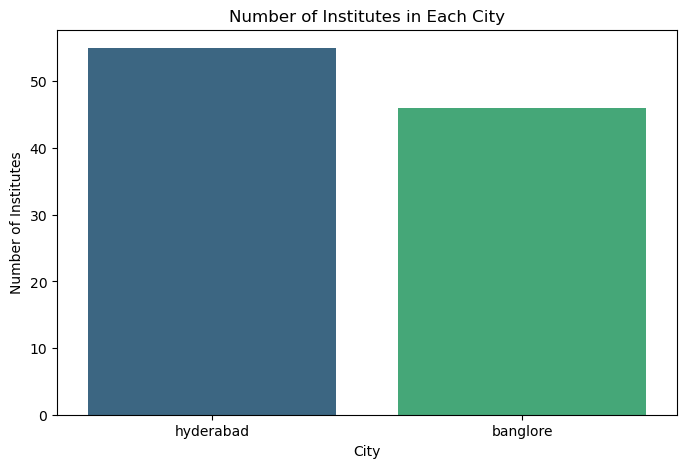

In [47]:

city_counts = raw['City'].value_counts().reset_index()
city_counts.columns = ['City', 'Number of Institutes']


plt.figure(figsize=(8, 5))
sns.barplot(data=city_counts, x='City', y='Number of Institutes', palette='viridis')


plt.title("Number of Institutes in Each City")
plt.xlabel("City")
plt.ylabel("Number of Institutes")

plt.show()

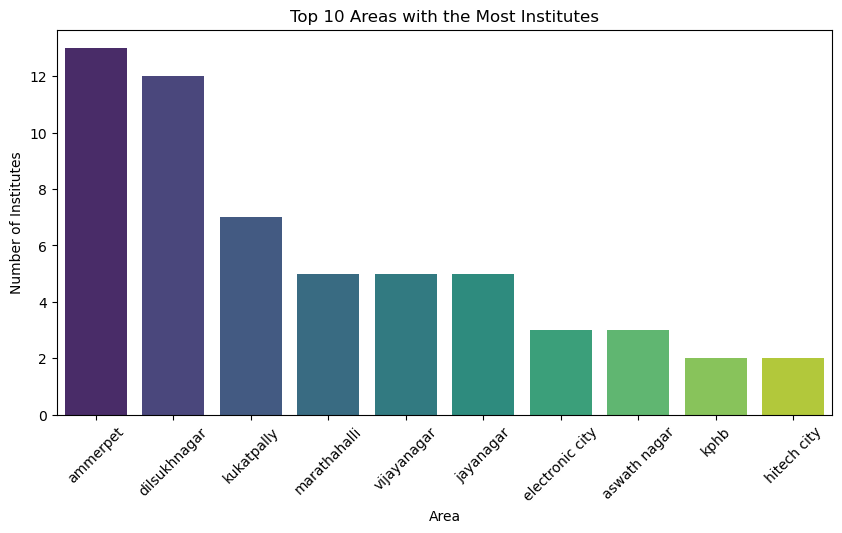

In [48]:
area_counts = raw['Area'].value_counts().reset_index()
area_counts.columns = ['Area', 'Number of Institutes']

top_areas = area_counts.head(10)
plt.figure(figsize=(10, 5))
sns.barplot(data=top_areas, x='Area', y='Number of Institutes', palette='viridis')

plt.title("Top 10 Areas with the Most Institutes")
plt.xlabel("Area")
plt.ylabel("Number of Institutes")
plt.xticks(rotation=45)  
plt.show()

**Multivarient**

<Axes: >

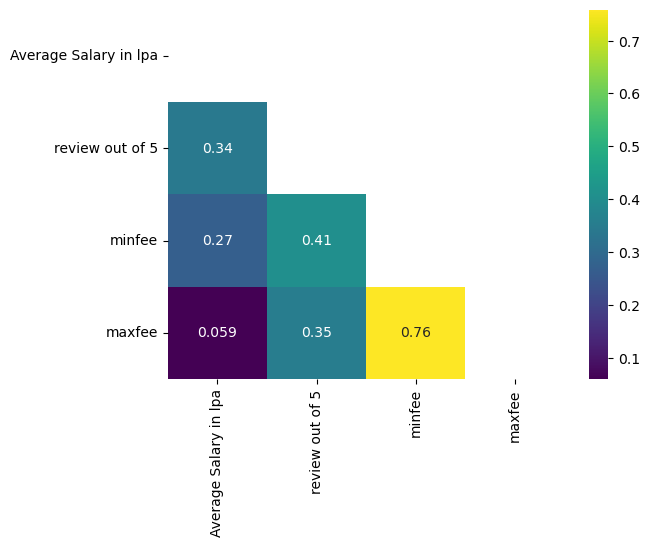

In [49]:

lower = np.triu(raw.corr(numeric_only=True))
sns.heatmap(raw.corr(numeric_only=True), annot=True, cmap='viridis', mask=lower)

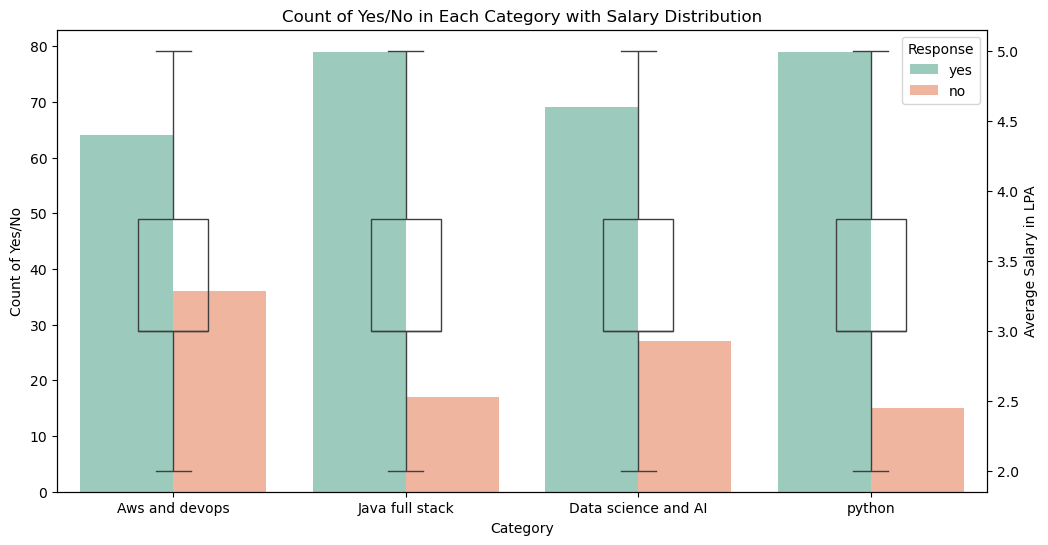

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
d = raw.melt(id_vars=['Average Salary in lpa'], 
             value_vars=['Aws and devops', 'Java full stack', 'Data science and AI', 'python'], 
             var_name='Category', value_name='Response')

plt.figure(figsize=(12, 6))

ax1 = sns.countplot(x='Category', hue='Response', data=d, palette='Set2', alpha=0.7)
ax2 = ax1.twinx()  # Create secondary y-axis
sns.boxplot(x='Category', y='Average Salary in lpa', data=d, ax=ax2, showfliers=False, width=0.3, boxprops={'facecolor':'None'})
plt.title("Count of Yes/No in Each Category with Salary Distribution")
ax1.set_ylabel("Count of Yes/No")
ax2.set_ylabel("Average Salary in LPA")
plt.show()





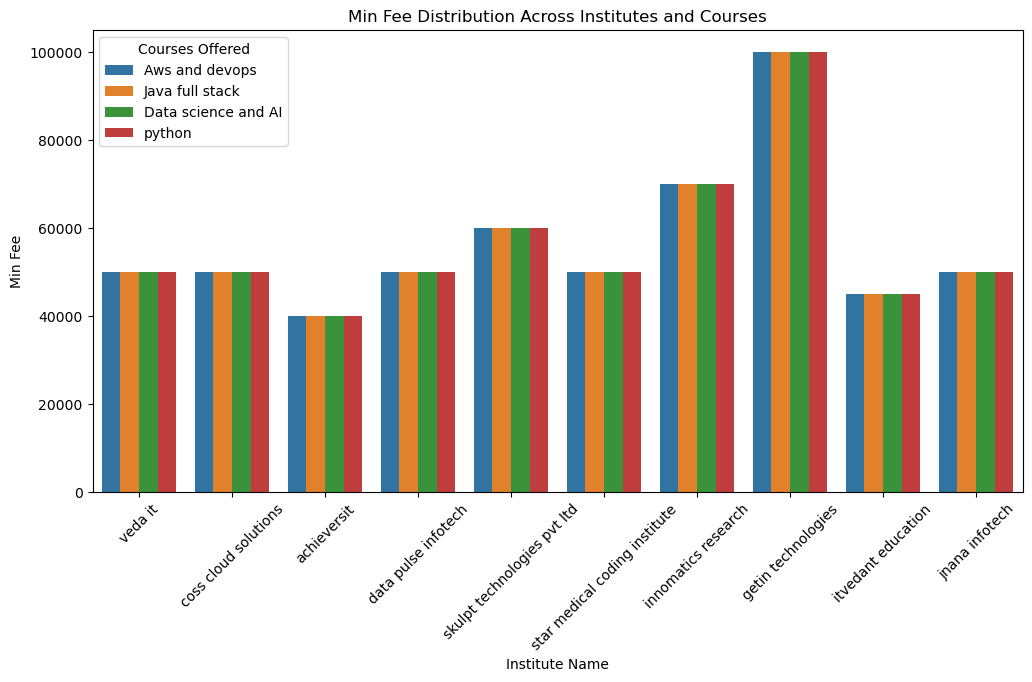

In [51]:
# Convert numeric values in course columns to "Yes"/"No"
course_columns = ["Aws and devops", "Java full stack", "Data science and AI", "python"]
for col in course_columns:
    raw[col] = raw[col].apply(lambda x: "Yes" if x != 0 else "No")

# Group by "Institute name" and sum "minfee", then get the top 10 institutes
df_top = (
    raw.groupby("Institute name")["minfee"]
    .sum()
    .nlargest(10)
    .reset_index()
)

# Melt the dataset to long format
df_melted = raw.melt(id_vars=["Institute name"], 
                     value_vars=course_columns, 
                     var_name="Course", 
                     value_name="Available")

# Keep only rows where courses are available ("Yes")
df_melted = df_melted[df_melted["Available"] == "Yes"]

# Merge top institutes with course availability
df_top_courses = df_melted.merge(df_top, on="Institute name")

# Check if the filtered dataset is empty
if df_top_courses.empty:
    print("No valid data available for visualization.")
else:
    # Visualization: Grouped Bar Chart
    plt.figure(figsize=(12, 6))
    barplot = sns.barplot(x="Institute name", y="minfee", hue="Course", data=df_top_courses)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    plt.title("Min Fee Distribution Across Institutes and Courses")
    plt.xlabel("Institute Name")
    plt.ylabel("Min Fee")

    # Ensure legend appears correctly
    handles, labels = barplot.get_legend_handles_labels()
    if labels:
        plt.legend(title="Courses Offered")
    else:
        plt.legend([],[], frameon=False)  # Hide legend if no labels exist
    
    plt.show()

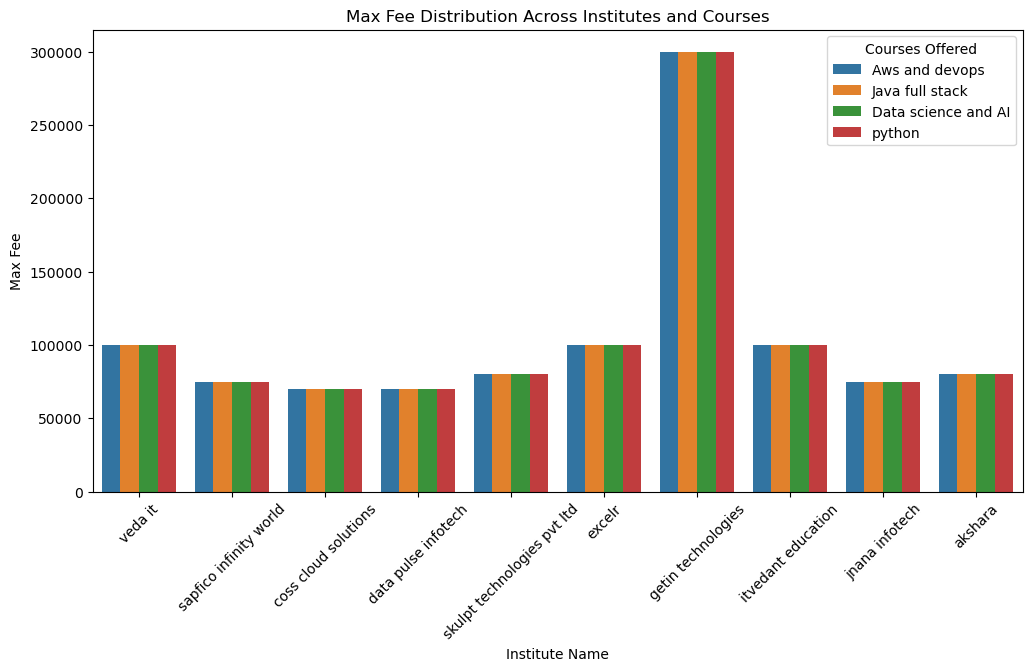

In [52]:
# Convert numeric values in course columns to "Yes"/"No"
course_columns = ["Aws and devops", "Java full stack", "Data science and AI", "python"]
for col in course_columns:
    raw[col] = raw[col].apply(lambda x: "Yes" if x != 0 else "No")

# Group by "Institute name" and sum "minfee", then get the top 10 institutes
df_top = (
    raw.groupby("Institute name")["maxfee"]
    .sum()
    .nlargest(10)
    .reset_index()
)

# Melt the dataset to long format
df_melted = raw.melt(id_vars=["Institute name"], 
                     value_vars=course_columns, 
                     var_name="Course", 
                     value_name="Available")

# Keep only rows where courses are available ("Yes")
df_melted = df_melted[df_melted["Available"] == "Yes"]

# Merge top institutes with course availability
df_top_courses = df_melted.merge(df_top, on="Institute name")

# Check if the filtered dataset is empty
if df_top_courses.empty:
    print("No valid data available for visualization.")
else:
    # Visualization: Grouped Bar Chart
    plt.figure(figsize=(12, 6))
    barplot = sns.barplot(x="Institute name", y="maxfee", hue="Course", data=df_top_courses)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    plt.title("Max Fee Distribution Across Institutes and Courses")
    plt.xlabel("Institute Name")
    plt.ylabel("Max Fee")

    # Ensure legend appears correctly
    handles, labels = barplot.get_legend_handles_labels()
    if labels:
        plt.legend(title="Courses Offered")
    else:
        plt.legend([],[], frameon=False)  # Hide legend if no labels exist
    
    plt.show()

**Insights**


- most of the institutes are present in the hyderabad.
- Most of institutes are present in the Ammerpet having the 22.8% and 2nd is Dilsukhnagar (21.1%).
- Most of the institutes preferring the both online and offline 
- most of institutes are offering job placement assistance with 46.9%
- Getin technology having the maxfee 300000
- Achievers having the minfee 40000
- From review analysis,getin technology having the 5/5 rating
- most demand courses are full stack and python than datascience

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Institute name            101 non-null    object 
 1   Area                      101 non-null    object 
 2   City                      101 non-null    object 
 3   Course Focus              101 non-null    object 
 4   Aws and devops            100 non-null    object 
 5   Java full stack           96 non-null     object 
 6   Data science and AI       96 non-null     object 
 7   python                    94 non-null     object 
 8   Target Audience           97 non-null     object 
 9   Faculty Expertise         97 non-null     object 
 10  Training Methodology      95 non-null     object 
 11  Placement Rate            97 non-null     object 
 12  Average Salary in lpa     99 non-null     float64
 13  Placement Support         100 non-null    object 
 14  Internship

In [54]:
data.isnull().sum()

Institute name              0
Area                        0
City                        0
Course Focus                0
Aws and devops              1
Java full stack             5
Data science and AI         5
python                      7
Target Audience             4
Faculty Expertise           4
Training Methodology        6
Placement Rate              4
Average Salary in lpa       2
Placement Support           1
Internship Opportunities    5
Certifications Offered      4
review out of 5             4
minfee                      5
maxfee                      5
dtype: int64

In [55]:
data.head()

,Institute name,Area,City,Course Focus,Aws and devops,Java full stack,Data science and AI,python,Target Audience,Faculty Expertise,Training Methodology,Placement Rate,Average Salary in lpa,Placement Support,Internship Opportunities,Certifications Offered,review out of 5,minfee,maxfee
0,social prachar,kphb,hyderabad,"java full stack,data science and ai,aws and de...",yes,yes,yes,yes,eligible for every graduate,well qualified,online and offline training,good,3.5,"resume preparation,linkedin profile creation,...",yes,yes,4.7,20000.0,45000.0
1,veda it,jntu university,hyderabad,"java ful stack,data analytics,manual testing,p...",yes,yes,yes,yes,freshers and experience,experience,online and offline training,good,4.0,soft skills training,yes,yes,3.9,50000.0,100000.0
2,crs info solutions,ammerpet,hyderabad,"devops automation,devops engineers,rpa trainin...",yes,no,no,no,freshers and experience,experience,online and offline training,good,3.5,"interview preparation,job placement assistance...",yes,yes,4.0,5000.0,7000.0
3,naresh i technologies,ammerpet and kphb,hyderabad,"advanced java training,angular raining,azure d...",yes,yes,yes,yes,freshers and experience and carrer gap,experience,online and offline training,average,3.0,"job placement assistance,project training,resu...",yes,yes,4.5,1999.0,10000.0
4,sapfico infinity world,ammerpet,hyderabad,"software testing,sa fico training",no,NaN,no,no,freshers and experience,experience,online and offline training,good,3.3,"real time projects,resume preperation,intervie...",no,yes,3.0,25000.0,75000.0


In [57]:
# Checking Na count percentage for each column

round((data.isnull().sum()/len(data))*100,2)

Institute name              0.00
Area                        0.00
City                        0.00
Course Focus                0.00
Aws and devops              0.99
Java full stack             4.95
Data science and AI         4.95
python                      6.93
Target Audience             3.96
Faculty Expertise           3.96
Training Methodology        5.94
Placement Rate              3.96
Average Salary in lpa       1.98
Placement Support           0.99
Internship Opportunities    4.95
Certifications Offered      3.96
review out of 5             3.96
minfee                      4.95
maxfee                      4.95
dtype: float64

In [58]:
data.shape

(101, 19)

In [59]:
allnaindx = data[data.isnull().sum(axis=1)>=9].index

print(len(allnaindx), " rows are dropped")

0  rows are dropped


In [60]:
for col in data.columns:
    if data[col].dtype == "object":
        data[col].fillna(data[col].mode().iloc[-1], inplace=True)
    else:
        data[col].fillna(data[col].median(), inplace=True)

In [61]:
data.isnull().sum()

Institute name              0
Area                        0
City                        0
Course Focus                0
Aws and devops              0
Java full stack             0
Data science and AI         0
python                      0
Target Audience             0
Faculty Expertise           0
Training Methodology        0
Placement Rate              0
Average Salary in lpa       0
Placement Support           0
Internship Opportunities    0
Certifications Offered      0
review out of 5             0
minfee                      0
maxfee                      0
dtype: int64

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Institute name            101 non-null    object 
 1   Area                      101 non-null    object 
 2   City                      101 non-null    object 
 3   Course Focus              101 non-null    object 
 4   Aws and devops            101 non-null    object 
 5   Java full stack           101 non-null    object 
 6   Data science and AI       101 non-null    object 
 7   python                    101 non-null    object 
 8   Target Audience           101 non-null    object 
 9   Faculty Expertise         101 non-null    object 
 10  Training Methodology      101 non-null    object 
 11  Placement Rate            101 non-null    object 
 12  Average Salary in lpa     101 non-null    float64
 13  Placement Support         101 non-null    object 
 14  Internship

**Outlier handling**

In [63]:
import plotly.express as px
import pandas as pd

def outlier_detect(df):
    cols_with_outliers = []
    
    for col in df.describe().columns:
        print("Column:", col)
        print("------------------------------------------------")
        print("Boxplot For Outlier Identification:")
        px.box(df[col], orientation='h', width=600, height=300).show()
        print()
        
        Q1 = df.describe().at['25%', col]
        Q3 = df.describe().at['75%', col]
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        print("********* Outlier Data Points *******")
        print()
        
        lower_outliers = df[df[col] < lower_bound][col].unique()
        upper_outliers = df[df[col] > upper_bound][col].unique()
        
        print("Lower Outliers:")
        print(sorted(lower_outliers))
        print()
        print("Upper Outliers:")
        print(sorted(upper_outliers))
        print()
        print("===============================================")
        print()
        
        if len(lower_outliers) > 0 or len(upper_outliers) > 0:
            cols_with_outliers.append(col)
    
    return cols_with_outliers

def outlier_replacement(df, cols, strategy='percentile'):
    for col in cols:
        print("Column:", col)
        print("------------------------------------------------")
        
        Q1 = df.describe().at['25%', col]
        Q3 = df.describe().at['75%', col]
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        if strategy == 'median':
            replacement_low = replacement_high = df[col].median()
        elif strategy == 'IQR':
            replacement_low = lower_bound
            replacement_high = upper_bound
        elif strategy == 'percentile':
            replacement_low = df[col].quantile(0.05)
            replacement_high = df[col].quantile(0.95)
        else:
            raise ValueError("Invalid strategy. Choose from 'median', 'IQR', 'percentile'.")
        
        print(f"Replacing Outliers using {strategy} strategy...")
        print()
        
        df[col] = df[col].mask(df[col] < lower_bound, round(replacement_low))
        df[col] = df[col].mask(df[col] > upper_bound, round(replacement_high))
    
    return df

Column: Average Salary in lpa
------------------------------------------------
Boxplot For Outlier Identification:


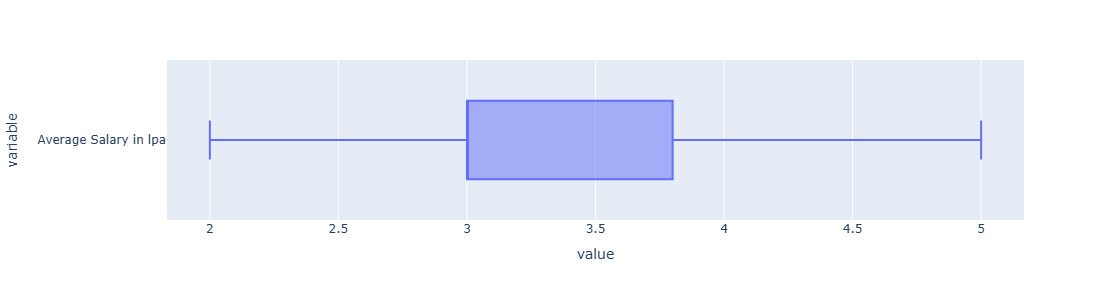


********* Outlier Data Points *******

Lower Outliers:
[]

Upper Outliers:
[]


Column: review out of 5
------------------------------------------------
Boxplot For Outlier Identification:


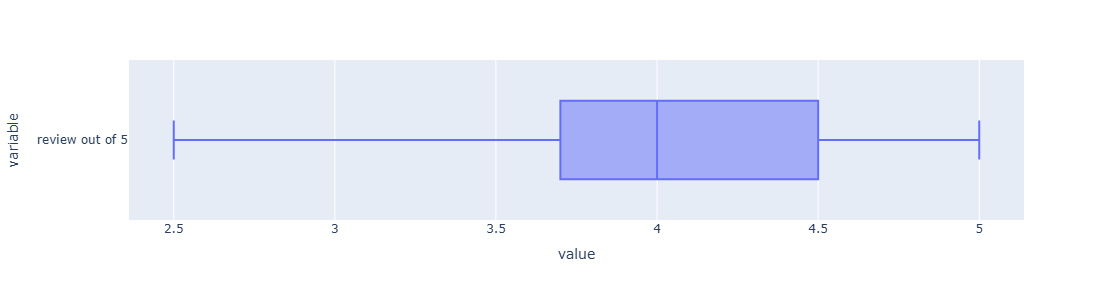


********* Outlier Data Points *******

Lower Outliers:
[2.5]

Upper Outliers:
[]


Column: minfee
------------------------------------------------
Boxplot For Outlier Identification:


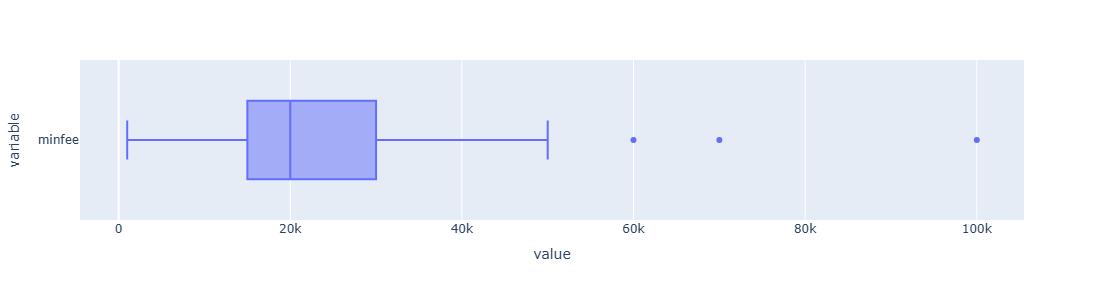


********* Outlier Data Points *******

Lower Outliers:
[]

Upper Outliers:
[60000.0, 70000.0, 100000.0]


Column: maxfee
------------------------------------------------
Boxplot For Outlier Identification:


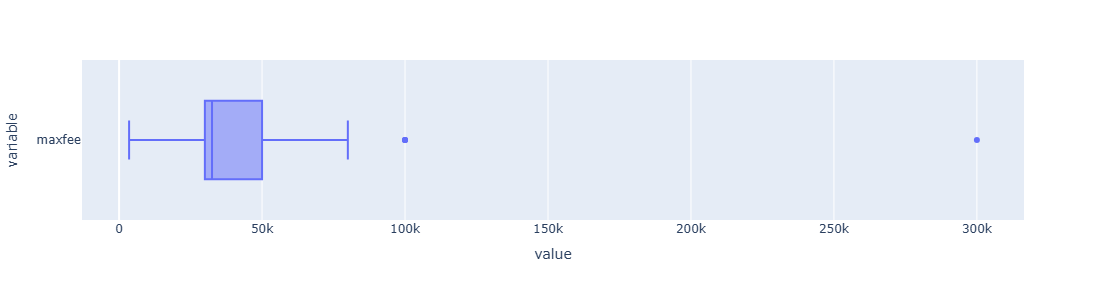


********* Outlier Data Points *******

Lower Outliers:
[]

Upper Outliers:
[100000.0, 300000.0]




In [64]:
outcols = outlier_detect(data)

In [65]:
outlier_replacement(data, outcols)

Column: review out of 5
------------------------------------------------
Replacing Outliers using percentile strategy...

Column: minfee
------------------------------------------------
Replacing Outliers using percentile strategy...

Column: maxfee
------------------------------------------------
Replacing Outliers using percentile strategy...



,Institute name,Area,City,Course Focus,Aws and devops,Java full stack,Data science and AI,python,Target Audience,Faculty Expertise,Training Methodology,Placement Rate,Average Salary in lpa,Placement Support,Internship Opportunities,Certifications Offered,review out of 5,minfee,maxfee
0,social prachar,kphb,hyderabad,"java full stack,data science and ai,aws and de...",yes,yes,yes,yes,eligible for every graduate,well qualified,online and offline training,good,3.5,"resume preparation,linkedin profile creation,...",yes,yes,4.7,20000.0,45000.0
1,veda it,jntu university,hyderabad,"java ful stack,data analytics,manual testing,p...",yes,yes,yes,yes,freshers and experience,experience,online and offline training,good,4.0,soft skills training,yes,yes,3.9,50000.0,80000.0
2,crs info solutions,ammerpet,hyderabad,"devops automation,devops engineers,rpa trainin...",yes,no,no,no,freshers and experience,experience,online and offline training,good,3.5,"interview preparation,job placement assistance...",yes,yes,4.0,5000.0,7000.0
3,naresh i technologies,ammerpet and kphb,hyderabad,"advanced java training,angular raining,azure d...",yes,yes,yes,yes,freshers and experience and carrer gap,experience,online and offline training,average,3.0,"job placement assistance,project training,resu...",yes,yes,4.5,1999.0,10000.0
4,sapfico infinity world,ammerpet,hyderabad,"software testing,sa fico training",no,yes,no,no,freshers and experience,experience,online and offline training,good,3.3,"real time projects,resume preperation,intervie...",no,yes,3.0,25000.0,75000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,nacc,banashankari,banglore,"java,python,ms excel,powerbi,c++programming",no,yes,no,yes,freshers and experience,experience,offline training,good,3.4,job assisance,yes,yes,3.0,10000.0,20000.0
97,master mind learning solutions,electronic city,banglore,"aws,data science,devops,java,python,web develo...",yes,yes,yes,yes,freshers and experience,experience,online and offline training,good,4.0,job assisance,yes,yes,4.0,30000.0,50000.0
98,hackers university apc,m g road,banglore,"aws,data science,java,python,oracle,cyber secu...",yes,yes,yes,yes,freshers and experience,experience,online and offline training,good,4.4,job assisance,yes,yes,4.2,30000.0,50000.0
99,stravan technologies,sanjay nagar,banglore,"java,python,data science,ms excel,oracle",no,yes,yes,yes,freshers and experience,experience,online and offline training,good,3.8,job assisance,yes,yes,3.8,30000.0,40000.0


Column: Average Salary in lpa
------------------------------------------------
Boxplot For Outlier Identification:


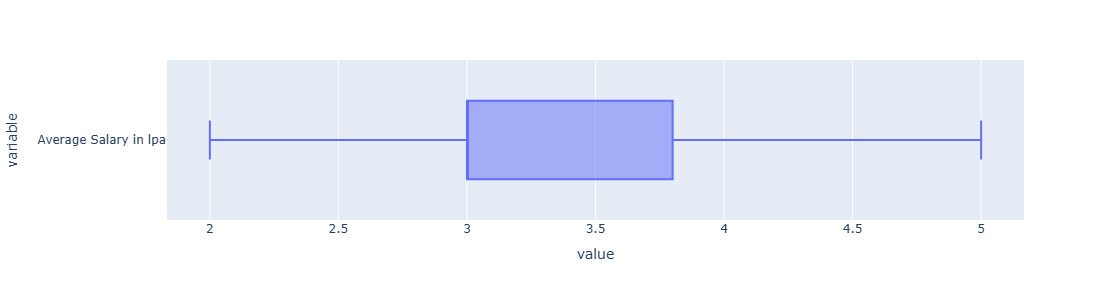


********* Outlier Data Points *******

Lower Outliers:
[]

Upper Outliers:
[]


Column: review out of 5
------------------------------------------------
Boxplot For Outlier Identification:


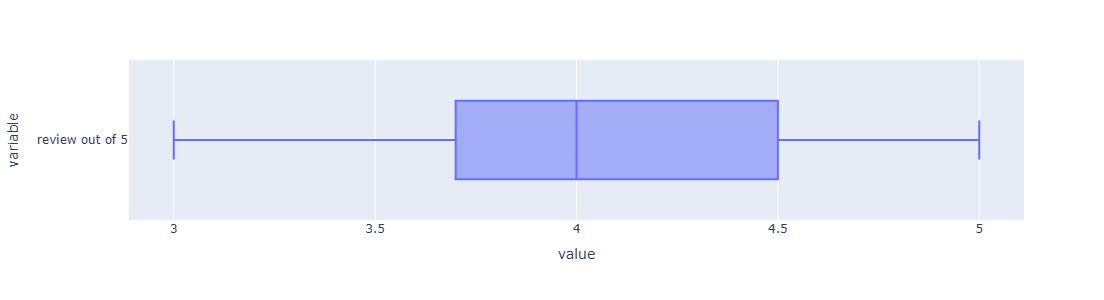


********* Outlier Data Points *******

Lower Outliers:
[]

Upper Outliers:
[]


Column: minfee
------------------------------------------------
Boxplot For Outlier Identification:


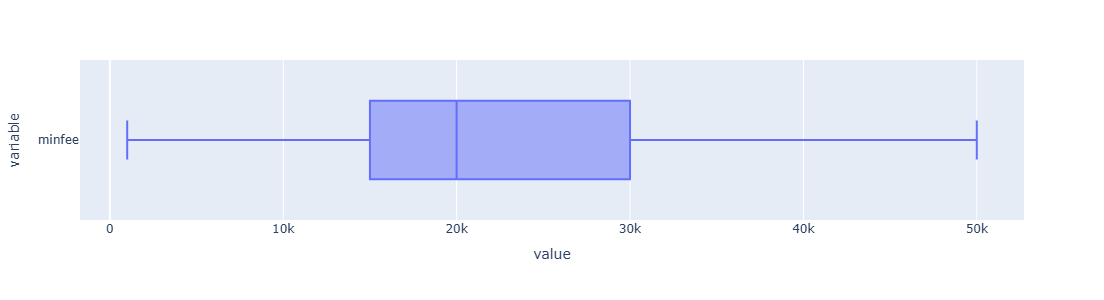


********* Outlier Data Points *******

Lower Outliers:
[]

Upper Outliers:
[]


Column: maxfee
------------------------------------------------
Boxplot For Outlier Identification:


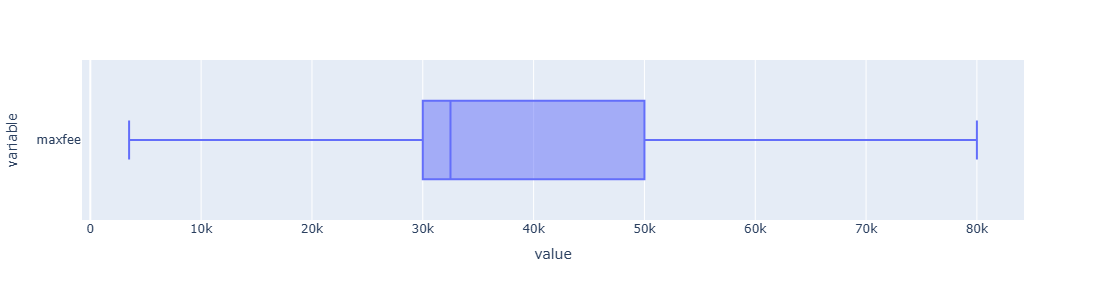


********* Outlier Data Points *******

Lower Outliers:
[]

Upper Outliers:
[]




[]

In [66]:

outlier_detect(data)

In [67]:
raw.to_csv("com.csv",index=False)

**Predictive Modeling**

**4.1 Input (x) and output(y) column for modeling from data**<a id='xy'>
    
[Back to Top](#menu)

In [68]:
data.head()

,Institute name,Area,City,Course Focus,Aws and devops,Java full stack,Data science and AI,python,Target Audience,Faculty Expertise,Training Methodology,Placement Rate,Average Salary in lpa,Placement Support,Internship Opportunities,Certifications Offered,review out of 5,minfee,maxfee
0,social prachar,kphb,hyderabad,"java full stack,data science and ai,aws and de...",yes,yes,yes,yes,eligible for every graduate,well qualified,online and offline training,good,3.5,"resume preparation,linkedin profile creation,...",yes,yes,4.7,20000.0,45000.0
1,veda it,jntu university,hyderabad,"java ful stack,data analytics,manual testing,p...",yes,yes,yes,yes,freshers and experience,experience,online and offline training,good,4.0,soft skills training,yes,yes,3.9,50000.0,80000.0
2,crs info solutions,ammerpet,hyderabad,"devops automation,devops engineers,rpa trainin...",yes,no,no,no,freshers and experience,experience,online and offline training,good,3.5,"interview preparation,job placement assistance...",yes,yes,4.0,5000.0,7000.0
3,naresh i technologies,ammerpet and kphb,hyderabad,"advanced java training,angular raining,azure d...",yes,yes,yes,yes,freshers and experience and carrer gap,experience,online and offline training,average,3.0,"job placement assistance,project training,resu...",yes,yes,4.5,1999.0,10000.0
4,sapfico infinity world,ammerpet,hyderabad,"software testing,sa fico training",no,yes,no,no,freshers and experience,experience,online and offline training,good,3.3,"real time projects,resume preperation,intervie...",no,yes,3.0,25000.0,75000.0


In [69]:
# Define feature variables (X)
X = data.drop(columns=["minfee", "maxfee"]) 
y = data[["minfee", "maxfee"]]  # Selecting the target columns


4.2 Feature Engineering (selecting proper x data for modeling)

In [70]:
raw.head()

,Institute name,Area,City,Course Focus,Aws and devops,Java full stack,Data science and AI,python,Target Audience,Faculty Expertise,Training Methodology,Placement Rate,Average Salary in lpa,Placement Support,Internship Opportunities,Certifications Offered,review out of 5,minfee,maxfee
0,social prachar,kphb,hyderabad,"java full stack,data science and ai,aws and de...",Yes,Yes,Yes,Yes,eligible for every graduate,well qualified,online and offline training,good,3.5,"resume preparation,linkedin profile creation,...",yes,yes,4.7,20000.0,45000.0
1,veda it,jntu university,hyderabad,"java ful stack,data analytics,manual testing,p...",Yes,Yes,Yes,Yes,freshers and experience,experience,online and offline training,good,4.0,soft skills training,yes,yes,3.9,50000.0,100000.0
2,crs info solutions,ammerpet,hyderabad,"devops automation,devops engineers,rpa trainin...",Yes,Yes,Yes,Yes,freshers and experience,experience,online and offline training,good,3.5,"interview preparation,job placement assistance...",yes,yes,4.0,5000.0,7000.0
3,naresh i technologies,ammerpet and kphb,hyderabad,"advanced java training,angular raining,azure d...",Yes,Yes,Yes,Yes,freshers and experience and carrer gap,experience,online and offline training,average,3.0,"job placement assistance,project training,resu...",yes,yes,4.5,1999.0,10000.0
4,sapfico infinity world,ammerpet,hyderabad,"software testing,sa fico training",Yes,Yes,Yes,Yes,freshers and experience,experience,online and offline training,good,3.3,"real time projects,resume preperation,intervie...",no,yes,3.0,25000.0,75000.0


In [71]:
X = X.drop(['Target Audience','Course Focus'], axis=1)

In [72]:
# Saving above input data for model deployment

X.to_csv("CampaInpData.csv", index=False)

4.2.2 Data Pre-Processing (Feature Modification)



In [73]:
cat_cols = X.select_dtypes("O")

In [74]:
cat_cols

,Institute name,Area,City,Aws and devops,Java full stack,Data science and AI,python,Faculty Expertise,Training Methodology,Placement Rate,Placement Support,Internship Opportunities,Certifications Offered
0,social prachar,kphb,hyderabad,yes,yes,yes,yes,well qualified,online and offline training,good,"resume preparation,linkedin profile creation,...",yes,yes
1,veda it,jntu university,hyderabad,yes,yes,yes,yes,experience,online and offline training,good,soft skills training,yes,yes
2,crs info solutions,ammerpet,hyderabad,yes,no,no,no,experience,online and offline training,good,"interview preparation,job placement assistance...",yes,yes
3,naresh i technologies,ammerpet and kphb,hyderabad,yes,yes,yes,yes,experience,online and offline training,average,"job placement assistance,project training,resu...",yes,yes
4,sapfico infinity world,ammerpet,hyderabad,no,yes,no,no,experience,online and offline training,good,"real time projects,resume preperation,intervie...",no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,nacc,banashankari,banglore,no,yes,no,yes,experience,offline training,good,job assisance,yes,yes
97,master mind learning solutions,electronic city,banglore,yes,yes,yes,yes,experience,online and offline training,good,job assisance,yes,yes
98,hackers university apc,m g road,banglore,yes,yes,yes,yes,experience,online and offline training,good,job assisance,yes,yes
99,stravan technologies,sanjay nagar,banglore,no,yes,yes,yes,experience,online and offline training,good,job assisance,yes,yes


In [75]:
for col in cat_cols:
    print(col, ":", cat_cols[col].nunique())
    print(cat_cols[col].unique())
    print()

Institute name : 100
['social prachar' 'veda it' 'crs info solutions' 'naresh i technologies'
 'sapfico infinity world' 'sivasoft technologies' 'sathya technologies'
 'vagdevi technologies' 'ashok technologies' 'dreams media solution'
 'stansys software solutions' 'best it academy' 'tcs ion trainig center'
 'magneq software' 'sv infotech' 'miit computer education'
 'data minds analytics' 'emeregent methodology pvt ltd'
 'creative multimedia academy' 'nys innovations' 'websoft technologies'
 'genesis it solutions' 'coss cloud solutions' 'thanush info solutions'
 'achieversit' 'data pulse infotech' 'v soft it solutions private ltd'
 'future gen technologies' 'orbit bn reddy' 'bridge q systems'
 'narayana technologies' 'kalyan it hub' 'neoteach software education'
 'risein academy' 'karan institute' '7i tech solutions' 'tecks academy'
 'vidyanidhi technologies' 'gro career' 'tech iq' 'excel logics'
 'sri amsoft technologies' 'uniq india' 'center cadd'
 'orbit technologies research pvt ltd

In [76]:
X.shape

(101, 15)

In [77]:
X.columns

Index(['Institute name', 'Area', 'City', 'Aws and devops', 'Java full stack',
       'Data science and AI', 'python', 'Faculty Expertise',
       'Training Methodology', 'Placement Rate', 'Average Salary in lpa',
       'Placement Support', 'Internship Opportunities',
       'Certifications Offered', 'review out of 5'],
      dtype='object')

In [78]:
binary_cols = ["Aws and devops", "Java full stack", "Data science and AI", "python","Certifications Offered","Internship Opportunities"]
X[binary_cols] = X[binary_cols].apply(lambda x: x.map({"yes": 1, "no": 0}))


In [79]:
X[binary_cols]

,Aws and devops,Java full stack,Data science and AI,python,Certifications Offered,Internship Opportunities
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,1,0,0,0,1,1
3,1,1,1,1,1,1
4,0,1,0,0,1,0
...,...,...,...,...,...,...
96,0,1,0,1,1,1
97,1,1,1,1,1,1
98,1,1,1,1,1,1
99,0,1,1,1,1,1


In [80]:
X.shape

(101, 15)

### Target encoding

In [81]:
X.City.replace({'hyderabad':0,'banglore':1}, inplace=True)


In [82]:
X['Training Methodology'].replace({'online and  offline training':0, 'offline training':1,'online training':2},inplace=True)

In [83]:
X['Training Methodology'].unique()

array([0, 1, 2], dtype=int64)

In [84]:
X["Placement Rate"].replace({"average":0, "good":1}, inplace=True)
X["Faculty Expertise"].replace({"experience":1, "well qualified":0}, inplace=True)

In [85]:
X.head()

,Institute name,Area,City,Aws and devops,Java full stack,Data science and AI,python,Faculty Expertise,Training Methodology,Placement Rate,Average Salary in lpa,Placement Support,Internship Opportunities,Certifications Offered,review out of 5
0,social prachar,kphb,0,1,1,1,1,0,0,1,3.5,"resume preparation,linkedin profile creation,...",1,1,4.7
1,veda it,jntu university,0,1,1,1,1,1,0,1,4.0,soft skills training,1,1,3.9
2,crs info solutions,ammerpet,0,1,0,0,0,1,0,1,3.5,"interview preparation,job placement assistance...",1,1,4.0
3,naresh i technologies,ammerpet and kphb,0,1,1,1,1,1,0,0,3.0,"job placement assistance,project training,resu...",1,1,4.5
4,sapfico infinity world,ammerpet,0,0,1,0,0,1,0,1,3.3,"real time projects,resume preperation,intervie...",0,1,3.0


In [86]:
X.shape

(101, 15)

In [87]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Institute name            101 non-null    object 
 1   Area                      101 non-null    object 
 2   City                      101 non-null    int64  
 3   Aws and devops            101 non-null    int64  
 4   Java full stack           101 non-null    int64  
 5   Data science and AI       101 non-null    int64  
 6   python                    101 non-null    int64  
 7   Faculty Expertise         101 non-null    int64  
 8   Training Methodology      101 non-null    int64  
 9   Placement Rate            101 non-null    int64  
 10  Average Salary in lpa     101 non-null    float64
 11  Placement Support         101 non-null    object 
 12  Internship Opportunities  101 non-null    int64  
 13  Certifications Offered    101 non-null    int64  
 14  review out

In [88]:
# Clean column names by stripping spaces Define keyword-based grouping function
def categorize_support(text):
    text = str(text).lower()  # Convert to lowercase for uniformity
    
    categories = {
        'Resume_Assistance': any(keyword in text for keyword in ['resume', 'linkedin']),
        'Interview_Training': any(keyword in text for keyword in ['interview', 'soft skills']),
        'Job_Placement': any(keyword in text for keyword in ['job placement', 'placement assistance']),
        'Project_Training': any(keyword in text for keyword in ['real time projects', 'internship', 'project'])
    }
    
    return pd.Series(categories)

# Apply the grouping function
df_encoded = X['Placement Support'].apply(categorize_support)


In [89]:
print(df_encoded)

     Resume_Assistance  Interview_Training  Job_Placement  Project_Training
0                 True                True          False             False
1                False                True          False             False
2                False                True           True             False
3                 True               False           True              True
4                 True                True          False              True
..                 ...                 ...            ...               ...
96               False               False          False             False
97               False               False          False             False
98               False               False          False             False
99               False               False          False             False
100              False               False          False             False

[101 rows x 4 columns]


In [90]:
# Concatenate with original dataset
X = pd.concat([X, df_encoded], axis=1)


In [91]:
X.head()

,Institute name,Area,City,Aws and devops,Java full stack,Data science and AI,python,Faculty Expertise,Training Methodology,Placement Rate,Average Salary in lpa,Placement Support,Internship Opportunities,Certifications Offered,review out of 5,Resume_Assistance,Interview_Training,Job_Placement,Project_Training
0,social prachar,kphb,0,1,1,1,1,0,0,1,3.5,"resume preparation,linkedin profile creation,...",1,1,4.7,True,True,False,False
1,veda it,jntu university,0,1,1,1,1,1,0,1,4.0,soft skills training,1,1,3.9,False,True,False,False
2,crs info solutions,ammerpet,0,1,0,0,0,1,0,1,3.5,"interview preparation,job placement assistance...",1,1,4.0,False,True,True,False
3,naresh i technologies,ammerpet and kphb,0,1,1,1,1,1,0,0,3.0,"job placement assistance,project training,resu...",1,1,4.5,True,False,True,True
4,sapfico infinity world,ammerpet,0,0,1,0,0,1,0,1,3.3,"real time projects,resume preperation,intervie...",0,1,3.0,True,True,False,True


In [92]:
X = X.drop(columns=['Placement Support'])


In [93]:
X.columns

Index(['Institute name', 'Area', 'City', 'Aws and devops', 'Java full stack',
       'Data science and AI', 'python', 'Faculty Expertise',
       'Training Methodology', 'Placement Rate', 'Average Salary in lpa',
       'Internship Opportunities', 'Certifications Offered', 'review out of 5',
       'Resume_Assistance', 'Interview_Training', 'Job_Placement',
       'Project_Training'],
      dtype='object')

In [94]:
job = ['Resume_Assistance','Interview_Training', 'Job_Placement', 'Project_Training']
X[job] = X[job].astype(bool)  # Ensure boolean type


In [95]:

X[job] = X[job].apply(lambda x: x.map({True: 1, False: 0}))


In [96]:
X['Institute name'].unique()

array(['social prachar', 'veda it', 'crs info solutions',
       'naresh i technologies', 'sapfico infinity world',
       'sivasoft technologies', 'sathya technologies',
       'vagdevi technologies', 'ashok technologies',
       'dreams media solution', 'stansys software solutions',
       'best it academy', 'tcs ion trainig center', 'magneq software',
       'sv infotech', 'miit computer education', 'data minds analytics',
       'emeregent methodology pvt ltd', 'creative multimedia academy',
       'nys innovations', 'websoft technologies', 'genesis it solutions',
       'coss cloud solutions', 'thanush info solutions', 'achieversit',
       'data pulse infotech', 'v soft it solutions private ltd',
       'future gen technologies', 'orbit bn reddy', 'bridge q systems',
       'narayana technologies', 'kalyan it hub',
       'neoteach software education', 'risein academy', 'karan institute',
       '7i tech solutions', 'tecks academy', 'vidyanidhi technologies',
       'gro career',

In [97]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import pickle
label_encoder = LabelEncoder() 
for col in ["Institute name", "Area"]:
    X[f"{col}"] = label_encoder.fit_transform(X[col])

# Step 2: Save the LabelEncoder to a pickle file
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)


In [98]:
X.head()

,Institute name,Area,City,Aws and devops,Java full stack,Data science and AI,python,Faculty Expertise,Training Methodology,Placement Rate,Average Salary in lpa,Internship Opportunities,Certifications Offered,review out of 5,Resume_Assistance,Interview_Training,Job_Placement,Project_Training
0,76,24,0,1,1,1,1,0,0,1,3.5,1,1,4.7,1,1,0,0
1,94,19,0,1,1,1,1,1,0,1,4.0,1,1,3.9,0,1,0,0
2,22,1,0,1,0,0,0,1,0,1,3.5,1,1,4.0,0,1,1,0
3,58,2,0,1,1,1,1,1,0,0,3.0,1,1,4.5,1,0,1,1
4,70,1,0,0,1,0,0,1,0,1,3.3,0,1,3.0,1,1,0,1


**Scaling**

In [99]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

numerical_cols = ["Institute name", "Area","Training Methodology", "Average Salary in lpa", "review out of 5"]

# Choose scaler (Uncomment the one you prefer)
scaler= MinMaxScaler()  # Scales between 0 and 1
# scaler = StandardScaler()  # Standardizes to mean 0, std 1

# Apply scaling only to numerical columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)



In [100]:
X.head()

,Institute name,Area,City,Aws and devops,Java full stack,Data science and AI,python,Faculty Expertise,Training Methodology,Placement Rate,Average Salary in lpa,Internship Opportunities,Certifications Offered,review out of 5,Resume_Assistance,Interview_Training,Job_Placement,Project_Training
0,0.767677,0.521739,0,1,1,1,1,0,0.0,1,0.500000,1,1,0.85,1,1,0,0
1,0.949495,0.413043,0,1,1,1,1,1,0.0,1,0.666667,1,1,0.45,0,1,0,0
2,0.222222,0.021739,0,1,0,0,0,1,0.0,1,0.500000,1,1,0.50,0,1,1,0
3,0.585859,0.043478,0,1,1,1,1,1,0.0,0,0.333333,1,1,0.75,1,0,1,1
4,0.707071,0.021739,0,0,1,0,0,1,0.0,1,0.433333,0,1,0.00,1,1,0,1


### Train_Test Split 

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
# Split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=123)

In [103]:
# Checking Shapes
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((75, 18), (26, 18), (75, 2), (26, 2))

We have output col data numeric, considering regression algorithms

**Regression Models/Algorithms:**

Linear Algorithms (when the data is linear to output (having correlation))

Linear Regression
Polynomial Regression
Lasso & Ridge Regression

Non-Linear Algorithms (when the data is non-linear to output (not having correlation) using classification algorithms)

Decision Tree Regressor
RandomForest Regressor
Xgboost Regressor
Support Vector Regressor
K Nearest Neighbors Regressor

In [104]:
#Algorithm Modules

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [105]:
# Multiple Linear Regression 

mlr = LinearRegression()

# Polynomial Regression

polyfeat = PolynomialFeatures(degree = 2)  # degree is hyperparam

poly = LinearRegression()

# Lasso (L1) & Ridge (L2)

lasso = Lasso(alpha = 5) # alpha/lambda - hyperparam - penalty

ridge = Ridge(alpha = 5)



# KNN

knnr = KNeighborsRegressor(n_neighbors=5) # n_neighbors - hyper param

# Support Vector Regressor

svr = SVR(kernel='rbf') # non-linear kernel for non-linear data

# Decision Tree Regressor

dtr = DecisionTreeRegressor()

# Random Forest regressor 

rfr = RandomForestRegressor() # n_estimators - hyperparam - number of decision trees

# Xgb

xgbr = XGBRegressor()

In [106]:
#4.4.1 Linear regression
mlr.fit(xtrain, ytrain)


LinearRegression()

4.4.2 Polynomial Regression

In [107]:
# Converting x data to poly features

xtrain_poly = polyfeat.fit_transform(xtrain) # fit_transform on train

xtest_poly = polyfeat.transform(xtest) # transform on test

In [108]:
xtrain_poly.shape, xtest_poly.shape

((75, 190), (26, 190))

In [109]:
# Applying Linear Regression to above polynomial features

poly.fit(xtrain_poly, ytrain)

LinearRegression()

 Lasso and Ridge

In [110]:
# Model Training

lasso.fit(xtrain,ytrain)
ridge.fit(xtrain,ytrain)

Ridge(alpha=5)

 KNN Regressor

In [111]:
knnr.fit(xtrain, ytrain)

KNeighborsRegressor()

In [112]:
knnr.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

 Support Vector Regressor

In [113]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr = MultiOutputRegressor(svr)  # Wrap SVR in MultiOutputRegressor
svr.fit(xtrain, ytrain)  # Now supports multi-target y


MultiOutputRegressor(estimator=SVR())

In [114]:
svr.get_params()

{'estimator__C': 1.0,
 'estimator__cache_size': 200,
 'estimator__coef0': 0.0,
 'estimator__degree': 3,
 'estimator__epsilon': 0.1,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVR(),
 'n_jobs': None}

 Decision Tree Regressor

In [115]:
# Initialize Decision Tree Regressor
dtr = DecisionTreeRegressor(max_depth=30, random_state=123)
  # Adjust max_depth for tuning

# Train (Fit) the Model
dtr.fit(xtrain, ytrain)

DecisionTreeRegressor(max_depth=30, random_state=123)

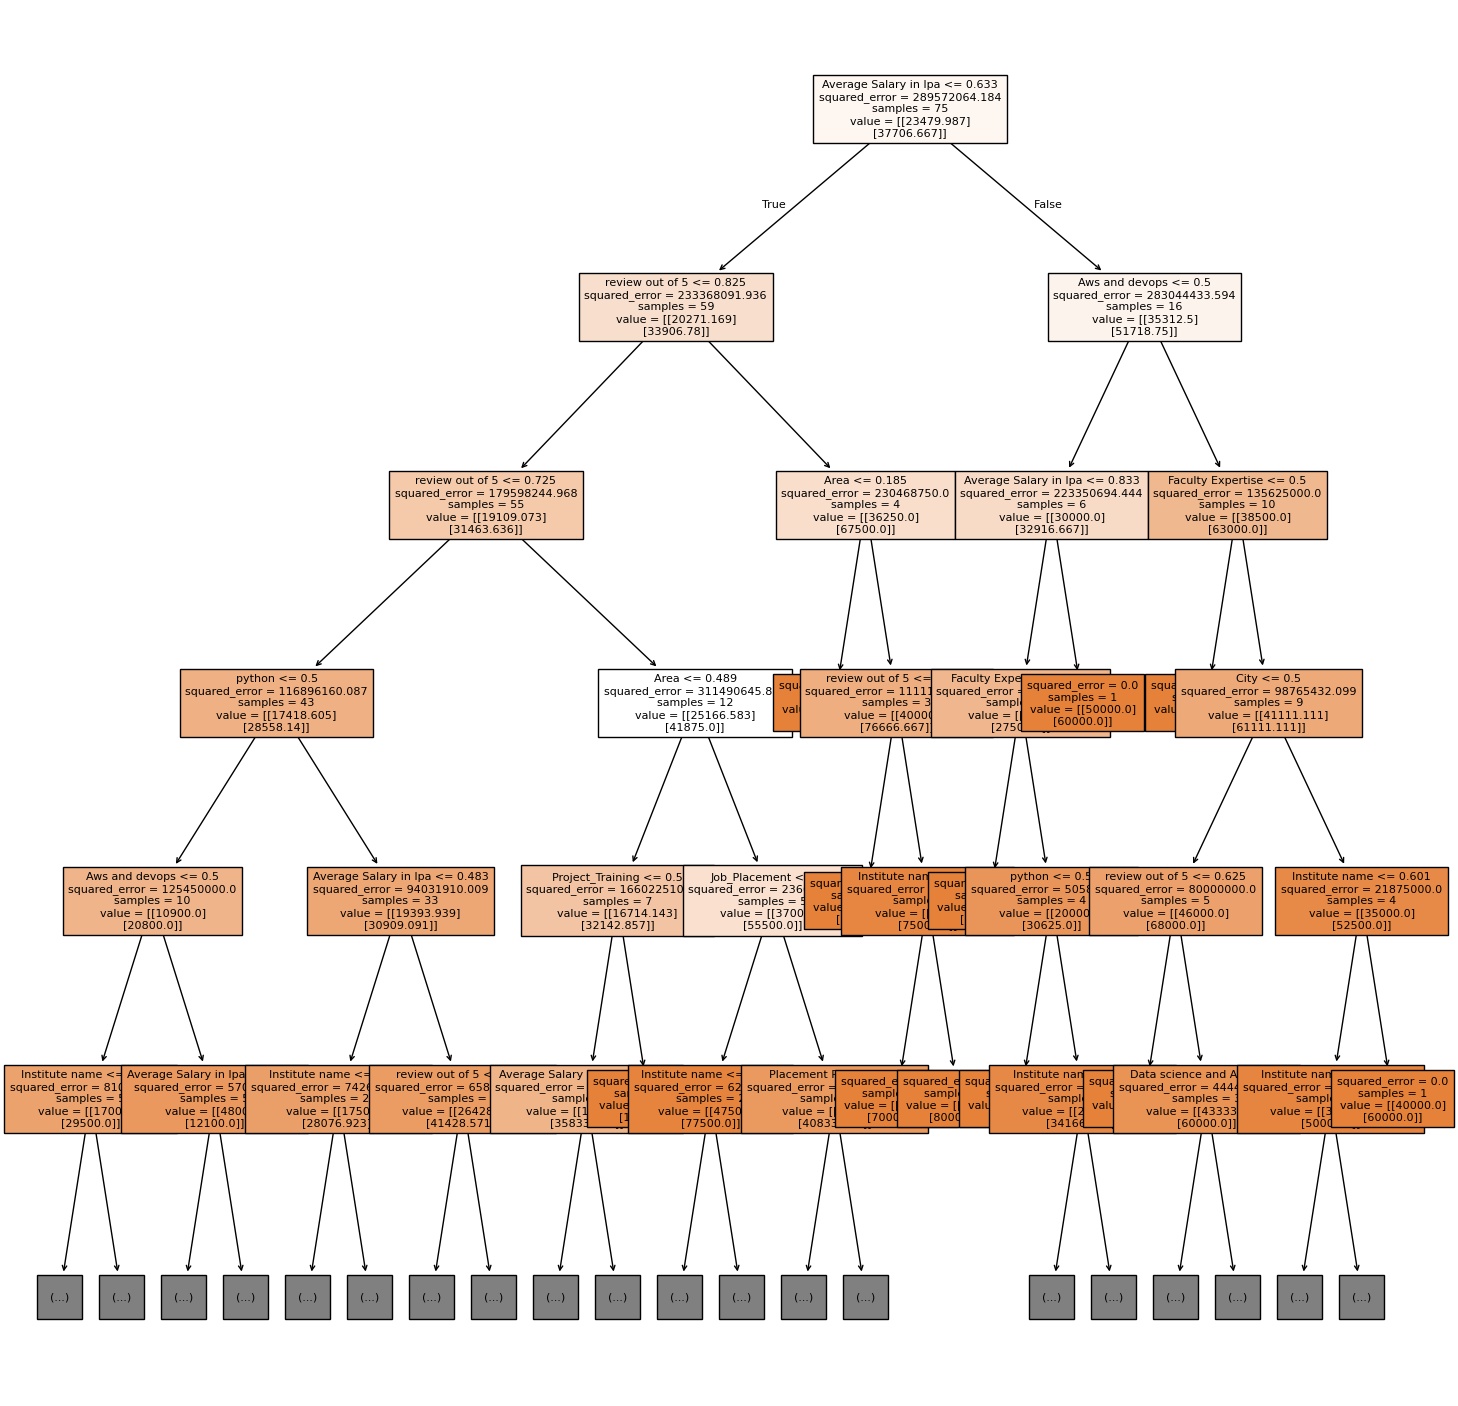

In [116]:
# Tree Visualization
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree

plt.figure(figsize=(18,18))
plot_tree(dtr,filled=True,fontsize=8,feature_names=list(xtrain.columns),max_depth=5)
plt.show()

 Random Forest Regressor

In [117]:
rfr.fit(xtrain, ytrain)

RandomForestRegressor()

In [118]:
# Model Params

print("Model Params:")
print(rfr.get_params())
print()
print("Columns Importance:")
print()
for i, j in zip(rfr.feature_names_in_, rfr.feature_importances_):
    print(i+": "+str(round(j,2)))

Model Params:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

Columns Importance:

Institute name: 0.13
Area: 0.1
City: 0.02
Aws and devops: 0.05
Java full stack: 0.01
Data science and AI: 0.02
python: 0.04
Faculty Expertise: 0.03
Training Methodology: 0.01
Placement Rate: 0.01
Average Salary in lpa: 0.22
Internship Opportunities: 0.02
Certifications Offered: 0.01
review out of 5: 0.24
Resume_Assistance: 0.03
Interview_Training: 0.02
Job_Placement: 0.02
Project_Training: 0.01


Xgb Regressor

In [119]:

xgbr.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### 4.5 & 4.6 Predictions & Evaluations

In [120]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings(action="ignore")

In [121]:
names = ['Multiple Linear Regression','Polynomial Regression','Lasso Regression','Ridge Regression','Knn Regressor', 'Svm Regressor',
           'Decision Tree Regressor','RandomForest Regressor', 'Xgboost Regressor']

models = {'mlr':mlr, 'poly':poly, 'lasso':lasso, 'ridge':ridge,  'knn':knnr, 'svm':svr, 'dt':dtr, 'rf':rfr, 'xgb':xgbr}

In [122]:

import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

def regval(xtrain, xtrain_poly, xtest, xtest_poly, ytrain, ytest, models):
    
    trainrmse = []
    testrmse = []
    trainr2 = []
    testr2 = []

    fit = []
    crossvalscore = []
    
    for name, model in models.items():
    
        if name!='poly':
            # RMSE, R2score
            ytrain_pred = model.predict(xtrain)
            ytest_pred = model.predict(xtest)

            # Cross-val score
            crossX = pd.concat([xtrain, xtest], axis = 0)
            crossy = pd.concat([ytrain, ytest], axis = 0)

            scores = cross_val_score(models[name], crossX, crossy, cv=3) # Taking 3 folds
            crossvalscore.append(round(scores.mean(),2))
        else:
            # RMSE, R2score
            ytrain_pred = model.predict(xtrain_poly)
            ytest_pred = model.predict(xtest_poly)

            # Cross-val score
            crossX = pd.concat([pd.DataFrame(xtrain_poly), pd.DataFrame(xtest_poly)], axis = 0)
            crossy = pd.concat([ytrain, ytest], axis = 0)

            scores = cross_val_score(models[name], crossX, crossy, cv=3) # Taking 3 folds
            crossvalscore.append(round(scores.mean(),2))
        ytrain_pred = np.abs(ytrain_pred)
        ytest_pred = np.abs(ytest_pred)
        trainrmse.append(round(np.sqrt(mean_squared_error(ytrain, ytrain_pred)),2))
        testrmse.append(round(np.sqrt(mean_squared_error(ytest, ytest_pred)),2))
        trainr2.append(round(r2_score(ytrain, ytrain_pred),2))
        testr2.append(round(r2_score(ytest, ytest_pred),2))
        trscore = r2_score(ytrain, ytrain_pred)
        tescore = r2_score(ytest, ytest_pred)

            # Bias-Variance Trade off
        if trscore>=0.60 and tescore>=0.60:
                if trscore>tescore:
                    if trscore-tescore>=0.10:
                        fit.append("Overfit")
                    elif trscore-tescore<0.10:
                        fit.append("Goodfit")
                    else:
                        fit.append('Nofit')
                elif trscore<tescore:
                    if tescore-trscore>=0.10:
                        fit.append("Overfit")
                    elif tescore-trscore<0.10:
                        fit.append("Goodfit")
                    else:
                        fit.append('Nofit')
                else:
                    fit.append("Nofit")

        elif trscore<0.60 and tescore<0.60:
                if abs(trscore)==0 and abs(tescore)==0:
                    fit.append("Nofit")
                else:
                    fit.append("Underfit")
        else:
                fit.append("Nofit")  
        
    return trainrmse, testrmse, trainr2, testr2, crossvalscore, fit

In [123]:
'''# Fit all models before passing them to regval
for name, model in models.items():
    if name == 'poly':
        # Fit polynomial regression
        model.fit(xtrain_poly, ytrain)
    else:
        # Fit other models
        model.fit(xtrain, ytrain)

# Now call regval
trainrmse, testrmse, trainr2, testr2, crossvalscore, fit = regval(xtrain, xtrain_poly, xtest, xtest_poly, ytrain, ytest, models)

# Print results
print("Train RMSE:", trainrmse)
print("Test RMSE:", testrmse)
print("Train R2:", trainr2)
print("Test R2:", testr2)
print("Cross-Val Score:", crossvalscore)
print("Fit:", fit)'''

'# Fit all models before passing them to regval\nfor name, model in models.items():\n    if name == \'poly\':\n        # Fit polynomial regression\n        model.fit(xtrain_poly, ytrain)\n    else:\n        # Fit other models\n        model.fit(xtrain, ytrain)\n\n# Now call regval\ntrainrmse, testrmse, trainr2, testr2, crossvalscore, fit = regval(xtrain, xtrain_poly, xtest, xtest_poly, ytrain, ytest, models)\n\n# Print results\nprint("Train RMSE:", trainrmse)\nprint("Test RMSE:", testrmse)\nprint("Train R2:", trainr2)\nprint("Test R2:", testr2)\nprint("Cross-Val Score:", crossvalscore)\nprint("Fit:", fit)'

In [124]:
trainrmse, testrmse, trainr2, testr2, crossvalscore, fit = regval(xtrain, xtrain_poly, xtest, xtest_poly, ytrain, ytest, models)

  File "C:\Users\allu indu\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\allu indu\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\allu indu\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\allu indu\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [125]:
# Complete Model Evaluation Table
# Display Options for Table
pd.set_option('display.float_format', lambda x: '%.3f' % x)

display(pd.DataFrame({'Model':names, 'TrainRMSE':trainrmse, 'TestRMSE':testrmse,
             'Trainscore':trainr2, 'Testscore':testr2, 'Crossvalscore':crossvalscore, 'Fit':fit}))

,Model,TrainRMSE,TestRMSE,Trainscore,Testscore,Crossvalscore,Fit
0,Multiple Linear Regression,12803.140,12713.370,0.440,-0.340,-0.370,Underfit
1,Polynomial Regression,0.000,81034.720,1.000,-69.900,-4638542415574469705728.000,Nofit
2,Lasso Regression,12806.180,12720.500,0.440,-0.340,-0.350,Underfit
3,Ridge Regression,13580.660,13146.410,0.360,-0.430,0.030,Underfit
4,Knn Regressor,13823.780,14870.290,0.330,-0.930,-0.110,Underfit
5,Svm Regressor,17582.900,11057.310,-0.070,-0.060,-0.090,Underfit
6,Decision Tree Regressor,0.000,17885.450,1.000,-1.750,-0.750,Nofit
7,RandomForest Regressor,5866.870,12177.090,0.880,-0.270,0.070,Nofit
8,Xgboost Regressor,0.080,13724.790,1.000,-0.530,-0.050,Nofit


**Hyperparameter**

In [126]:

import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
# 🔹 Define XGBoost model
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

# 🔹 Define hyperparameter grid for tuning
param_grid = {
    "n_estimators": [100, 200, 500],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0]
}

# 🔹 Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",  # Minimize MSE
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1
)
grid_search.fit(xtrain, ytrain)

# 🔹 Get best hyperparameters
best_params = grid_search.best_params_
print("🔹 Best Hyperparameters:", best_params)

# 🔹 Train the final model with the best parameters
best_xgb = xgb.XGBRegressor(**best_params, objective="reg:squarederror", random_state=42)
best_xgb.fit(xtrain, ytrain)

# 🔹 Predict on test data
ypred = best_xgb.predict(xtest)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
🔹 Best Hyperparameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}


In [127]:
# 🔹 Predict on both train and test data
y_train_pred = best_xgb.predict(xtrain)
y_test_pred = best_xgb.predict(xtest)
y_train_pred = np.abs(y_train_pred)
y_test_pred = np.abs(y_test_pred)

# 🔹 Compute RMSE
train_rmse = np.sqrt(mean_squared_error(ytrain, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(ytest, y_test_pred))

# 🔹 Compute R² Score
train_r2 = r2_score(ytrain, y_train_pred)
test_r2 = r2_score(ytest, y_test_pred)

# 🔹 Print results
print(f"🔹 Train RMSE: {train_rmse:.3f}")
print(f"🔹 Test RMSE: {test_rmse:.3f}")
print(f"🔹 Train R² Score: {train_r2:.3f}")
print(f"🔹 Test R² Score: {test_r2:.3f}")


🔹 Train RMSE: 86.994
🔹 Test RMSE: 13073.839
🔹 Train R² Score: 1.000
🔹 Test R² Score: -0.382


In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define the model
dtr = DecisionTreeRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 10,15,20,25, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Perform Grid Search
grid_search = GridSearchCV(dtr, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(xtrain, ytrain)




Fitting 5 folds for each of 252 candidates, totalling 1260 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15, 20, 25, None],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='r2', verbose=1)

In [129]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Get the best model from hyperparameter tuning
best_model = grid_search.best_estimator_  # Use this if you used GridSearchCV
# best_model = random_search.best_estimator_  # Use this if you used RandomizedSearchCV

# Make predictions
y_pred_train = best_model.predict(xtrain)
y_pred_test = best_model.predict(xtest)
y_train_pred = np.abs(y_train_pred)
y_test_pred = np.abs(y_test_pred)

# Calculate R² Score
trainr2 = r2_score(ytrain, y_pred_train)
testr2 = r2_score(ytest, y_pred_test)

# Calculate RMSE
trainrmse = np.sqrt(mean_squared_error(ytrain, y_pred_train))
testrmse = np.sqrt(mean_squared_error(ytest, y_pred_test))

# Print Results
print("Train R² Score:", trainr2)
print("Test R² Score:", testr2)
print("Train RMSE:", trainrmse)
print("Test RMSE:", testrmse)


Train R² Score: 0.4926934644905285
Test R² Score: -1.9293895208173566
Train RMSE: 11810.20397657599
Test RMSE: 19234.00893868278


In [130]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score


In [131]:
# Define the hyperparameter search space
param_dist = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees
    'max_depth': [5, 10, 20, None],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required in a leaf node
    'max_features': ['sqrt', 'log2', None],  # Number of features considered per split
    'bootstrap': [True, False]  # Whether bootstrap samples are used
}


In [132]:
# Define the model
rf = RandomForestRegressor(random_state=123)

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,  # Number of random combinations to try
    cv=5,  # 5-fold cross-validation
    scoring='r2',  # Optimize for R² score
    n_jobs=-1,  # Use all CPU cores
    verbose=1,
    random_state=42
)

# Fit the model
random_search.fit(xtrain, ytrain)

# Best model
best_rf = random_search.best_estimator_

print("Best Parameters:", random_search.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10, 'bootstrap': True}


In [133]:
# Make predictions
y_pred_train = best_rf.predict(xtrain)
y_pred_test = best_rf.predict(xtest)
y_train_pred = np.abs(y_train_pred)
y_test_pred = np.abs(y_test_pred)

# Calculate R² Score
trainr2 = r2_score(ytrain, y_pred_train)
testr2 = r2_score(ytest, y_pred_test)

# Calculate RMSE
trainrmse = np.sqrt(mean_squared_error(ytrain, y_pred_train))
testrmse = np.sqrt(mean_squared_error(ytest, y_pred_test))

# Print Results
print("Train R² Score:", trainr2)
print("Test R² Score:", testr2)
print("Train RMSE:", trainrmse)
print("Test RMSE:", testrmse)


Train R² Score: 0.7643773510642933
Test R² Score: -0.37228393211259514
Train RMSE: 8160.077618483125
Test RMSE: 12716.83879527379


In [134]:
# Train Linear Regression model
model = LinearRegression()
model.fit(xtrain, ytrain)


# Predictions for train and test sets
y_train_pred = model.predict(xtrain)
y_test_pred = model.predict(xtest)


# Compute RMSE & R² for Training Set
train_rmse = np.sqrt(mean_squared_error(ytrain, y_train_pred))
train_r2 = r2_score(ytrain, y_train_pred)

# Compute RMSE & R² for Testing Set
test_rmse = np.sqrt(mean_squared_error(ytest, y_test_pred))
test_r2 = r2_score(ytest, y_test_pred)

# Print results
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Training R² Score: {train_r2:.2f}")
print(f"Testing RMSE: {test_rmse:.2f}")
print(f"Testing R² Score: {test_r2:.2f}")

Training RMSE: 12834.58
Training R² Score: 0.44
Testing RMSE: 18020.31
Testing R² Score: -1.73


In [135]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize Ridge model
ridge = Ridge()

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(xtrain, ytrain)

# Best hyperparameter
print("Best alpha:", grid_search.best_params_['alpha'])


Best alpha: 10


In [136]:
# Train model with best parameters
best_ridge = Ridge(alpha=grid_search.best_params_['alpha'])
best_ridge.fit(xtrain, ytrain)

# Predict on train & test sets
y_train_pred = best_ridge.predict(xtrain)
y_test_pred = best_ridge.predict(xtest)
y_train_pred = np.abs(y_train_pred)
y_test_pred = np.abs(y_test_pred)

# Compute RMSE & R²
trainrmse = np.sqrt(mean_squared_error(ytrain, y_train_pred))
testrmse = np.sqrt(mean_squared_error(ytest, y_test_pred))

trainr2 = r2_score(ytrain, y_train_pred)
testr2 = r2_score(ytest, y_test_pred)

print(f"Tuned Training RMSE: {trainrmse:.2f}")
print(f"Tuned Training R² Score: {trainr2:.2f}")
print(f"Tuned Testing RMSE: {testrmse:.2f}")
print(f"Tuned Testing R² Score: {testr2:.2f}")


Tuned Training RMSE: 14079.40
Tuned Training R² Score: 0.31
Tuned Testing RMSE: 12551.26
Tuned Testing R² Score: -0.32


In [137]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

model = make_pipeline(PolynomialFeatures(degree=3), Ridge(alpha=1.0))
model.fit(xtrain, ytrain)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('ridge', Ridge())])

In [138]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions for training and testing sets
y_train_pred = model.predict(xtrain)
y_test_pred = model.predict(xtest)

# Compute RMSE & R² for Training Set
train_rmse = np.sqrt(mean_squared_error(ytrain, y_train_pred))
train_r2 = r2_score(ytrain, y_train_pred)

# Compute RMSE & R² for Testing Set
test_rmse = np.sqrt(mean_squared_error(ytest, y_test_pred))
test_r2 = r2_score(ytest, y_test_pred)

# Print results
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Training R² Score: {train_r2:.2f}")
print(f"Testing RMSE: {test_rmse:.2f}")
print(f"Testing R² Score: {test_r2:.2f}")
y_train_pred = np.abs(y_train_pred)
y_test_pred = np.abs(y_test_pred)



Training RMSE: 4280.40
Training R² Score: 0.93
Testing RMSE: 20976.66
Testing R² Score: -2.77


In [139]:
# Module

import joblib

In [140]:
# Saving above mentioned object files
joblib.dump(svr, "jobsvmreg.pkl")
joblib.dump(scaler, "sc.pkl")

['sc.pkl']

In [141]:
# Loading Saved object files

model = joblib.load("jobsvmreg.pkl")
scaler = joblib.load("sc.pkl")

# Loading Saved Ordinal Encoded files
with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)
    

In [142]:
X.columns

Index(['Institute name', 'Area', 'City', 'Aws and devops', 'Java full stack',
       'Data science and AI', 'python', 'Faculty Expertise',
       'Training Methodology', 'Placement Rate', 'Average Salary in lpa',
       'Internship Opportunities', 'Certifications Offered', 'review out of 5',
       'Resume_Assistance', 'Interview_Training', 'Job_Placement',
       'Project_Training'],
      dtype='object')

In [143]:
def minmaxfee():
    print("Estimation of minmaxfee Built on Below Input Data:")
    inpdata = pd.read_csv("CampaInpData.csv")
    display(inpdata.head())
    
    print("\n  Enter Any details required  ")
    print("==============================================================\n")
    
    user_inputs = {}  # Dictionary to store user responses
    
    for col in inpdata.columns:
        unique_values = inpdata[col].unique()  # Get unique values for the column
        
        print(f"{col}:")
        
        # If the column is numerical, use eval() to accept numerical input within a valid range
        if inpdata[col].dtype in ['int64', 'float64']:
            user_inputs[col] = eval(input(f"Enter {col}, Range-{inpdata[col].min()} to {inpdata[col].max()}: "))
        else:
            # If the column is categorical, display unique options and ask for input
            print(f"Options: {unique_values}")
            user_inputs[col] = input(f"Select {col}: ")
        
        print()  # Blank line for readability
    
    # Convert user inputs to a DataFrame
    row = pd.DataFrame([user_inputs])
    
    print("\nGiven Input Data:")
    display(row)
    print()
    
    # Feature Engineering: Need to apply same steps done for training, while giving it to model for prediction

    binary_cols = ["Aws and devops", "Java full stack", "Data science and AI", "python","Certifications Offered","Internship Opportunities"]
    row[binary_cols] = row[binary_cols].apply(lambda x: x.map({"yes": 1, "no": 0}))

    row.City.replace({'hyderabad':0,'banglore':1}, inplace=True)  
    row['Training Methodology'].replace({'online and  offline training':0, 'offline training':1,'online training':2},inplace=True)
    row["Placement Rate"].replace({"average":0, "good":1}, inplace=True)
    row["Faculty Expertise"].replace({"experience":1, "well qualified":0}, inplace=True)    
    def categorize_support(text):
      text = str(text).lower()  # Convert to lowercase for uniformity
      
      categories = {
          'Resume_Assistance': any(keyword in text for keyword in ['resume', 'linkedin']),
          'Interview_Training': any(keyword in text for keyword in ['interview', 'soft skills']),
          'Job_Placement': any(keyword in text for keyword in ['job placement', 'placement assistance']),
          'Project_Training': any(keyword in text for keyword in ['real time projects', 'internship', 'project'])
      }
    
      return pd.Series(categories)

     # Apply the grouping function
    df_encoded = row['Placement Support'].apply(categorize_support)
    row = pd.concat([row, df_encoded], axis=1)
    row = row.drop(columns=['Placement Support'])
    job = ['Resume_Assistance','Interview_Training', 'Job_Placement', 'Project_Training']
    row[job] = row[job].astype(bool)
    row[job] = row[job].apply(lambda x: x.map({True: 1, False: 0}))

    # LabelEncoding
    for col in ["Institute name", "Area"]:
      row[f"{col}"] = label_encoder.fit_transform(row[col])

    # Scaling
    numerical_cols = ["Institute name", "Area","Training Methodology", "Average Salary in lpa", "review out of 5"]

    # Apply scaling only to numerical columns
    row[numerical_cols] = scaler.fit_transform(row[numerical_cols])
    
    # Prediction
     # **Prediction**
    min_fee, max_fee = model.predict(row)[0]

    # **Display Results**
    print(f"\n🎯 Predicted Min Fee: {round(min_fee, 2)} LPA")
    print(f"🎯 Predicted Max Fee: {round(max_fee, 2)} LPA")